
#  <span style="color:#9400D3;text-decoration:overline;font-weight:bold"><u>CAPSTONE PROJECT MACHINE LEARNING</u></span>


**DOMAIN:** Housing

**Problem statement:**

   Identifying correct price of any real estate has been always a little complex process as it needs to consider various factors and property features which varies drastically. It becomes difficult to quote correct price for any particular house because of the factors such as location of the property like coastal or hill stationed property or in centre of the city, accessibility towards emergency services like hospitals, accessibility towards local transportations like Airport, Metro and bus stations, builder or type of build, amenities available along with the house and house conditions. Additionally, the price at which neighbourhood houses are being sold also highly affects the house prices

   To overcome above mentioned hurdles buyers and sellers seek experts to help them estimate correct price for their respective property. A real estate agent gets involved from both buyer and sellers end who possesses extensive knowledge of the real estate. Such agents shall convince buyers to buy a specified property and likewise convince seller to sell their property. Under such circumstances potential Agent acting as a middle man would quote an amount to buyer after adding hidden cost upon seller’s asking price. In such case buyer pays more than the actual property value. Likewise, agents also convince sellers on their property not being up to the mark and will have to adjust the asking price and to reduce a certain amount from same. Such reduced amount is again added into Agent’s bucket.



**Objective:**

Take advantage of all of the feature variables available below, use it to analyse and predict house prices.
1. cid: a notation for a house 
2. dayhours: Date house was sold 
3. price: Price is prediction target 
4. room_bed: Number of Bedrooms/House 
5. room_bath: Number of bathrooms/bedrooms 
6. living_measure: square footage of the home 
7. lot_measure: square footage of the lot 
8. ceil: Total floors (levels) in house 
9. coast: House which has a view to a waterfront 
10. sight: Has been viewed 
11. condition: How good the condition is (Overall) 
12. quality: grade given to the housing unit, based on grading system 
13. ceil_measure: square footage of house apart from basement 
14. basement_measure: square footage of the basement 
15. yr_built: Built Year 
16. yr_renovated: Year when house was renovated 
17. zipcode: zip 
18. lat: Latitude coordinate 
19. long: Longitude coordinate 
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area 
21. lot_measure15: lotSize area in 2015(implies-- some renovations) 
22. furnished: Based on the quality of room 
23. total_area: Measure of both living and lot

***
## <span style="color:#9400D3">Importing Required Python Libraries and Modules
  Here we are importing all the Libraries and Modules that are needed in a single cell and set some requirements for the whole project.

In [1]:
# Basic Libraries 
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Scikit-learn Modules
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, ARDRegression, BayesianRidge, ElasticNet, ElasticNetCV
from sklearn.linear_model import HuberRegressor, Lars, LarsCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor, RidgeCV, TweedieRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.cross_decomposition import CCA, PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Other Modules
from scipy.stats import zscore
from xgboost import XGBRegressor
import pickle


# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# Settings to display all columns
pd.set_option("display.max_columns", None)

***
# <span style="color:#9400D3">Import and Warehouse Data
Here we are importing the datasets and explore shape and size of it.
    
Note:-
   * The data file provided is in CSV format.
   * If the data file fails to load, then please check whether the coded file name matches the stored data file!

## <span style="color:#9400D3">- Exploring the Data

In [7]:
# Loading the data file and creating a dataframe
House_Data = pd.read_csv('innercity.csv')

# Getting Shape and Size of data
H_shape = House_Data.shape

# Displaying the Dataset
print('\033[1mDataset consist:-\033[0m\n Rows    =',H_shape[0],'\n Columns =',H_shape[1],'\n\n\033[1mDataset:-\033[0m')
display(House_Data.head())

Dataset consist:-
 Rows    = 21613 
 Columns = 23 

Dataset:-


cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  condition  quality  ceil_measure  \
0        13457   1.0      0      0          5        9          3020   
1         7500   1.0      0      0          3        8          1750   
2         4324   2.0      0      0          3        8          2370   
3         3844   1.0      0      0          4        6           820   
4         4050   1.0      0      0          4        8          1400   

   basement  yr_built  yr_renovated  zipcode      lat     long  \
0         0      1956             0    98133  47.7174 -122.336   
1       800      1976             0    98023  47.3165 -122.386   
2         0      2006             0    98038  47.3515 -121.999   
3         0      1916             0    98133  47.7049 -122.349   
4         0      1954             0    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  
0              2120           7553          1       16477  
1              2260           8800          0       10050  
2              2370           4348          0        6694  
3              1520           3844          0        4664  
4              1900           5940          0        5450

***
**Key Observations:-**
* Dataset is loaded successfully.
* It has 21613 rows and 23 columns.
* We can observe that the 'dayhours' attribute representing the "date house was sold" is not in date format.
* Hence we need to alter the values of 'dayhours' attribute.
***

# <span style="color:#9400D3">Data Cleansing

## <span style="color:#9400D3"> - Modification of the Attributes
    
* Since we found that the 'dayhours' attribute is not in date format, we need to modify it to bring it in a proper format.
* We observe that 'dayhours' consist of date along with time.
* Since the time at which the house was sold is not useful much to our further process, we can skip them.
* Hence we are keeping only the date in 'dayhours' attribute.

In [8]:
# Converting the 'dayhours' attribute to date-time format and keeping Year and Month only
House_Data['dayhours'] = pd.to_datetime(House_Data['dayhours'])

# Checking 'dayhours' attribute after the conversion
print('\n\033[1m"dayhours" attribute after the conversion:-')
display(House_Data[['cid','dayhours']].head())


"dayhours" attribute after the conversion:-


cid   dayhours
0  3034200666 2014-11-07
1  8731981640 2014-12-04
2  5104530220 2015-04-20
3  6145600285 2014-05-29
4  8924100111 2015-04-24

***
**Key Observations:-**
* We can observe that the 'dayhours' attribute consist only the year and month in it.
***

## <span style="color:#9400D3">- Exploring Datatypes of Each Attribute

In [4]:
# Exploring dataset
print('\n\033[1mData Types of Each Attribute:-')
display(House_Data.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


Data Type
cid                        int64
dayhours          datetime64[ns]
price                      int64
room_bed                   int64
room_bath                float64
living_measure             int64
lot_measure                int64
ceil                     float64
coast                      int64
sight                      int64
condition                  int64
quality                    int64
ceil_measure               int64
basement                   int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
living_measure15           int64
lot_measure15              int64
furnished                  int64
total_area                 int64

***
**Key Observations:-**
* Here we observe that 4 attributes have 'float64' datatype and 1 attribute has 'datetime64' data type.
* Rest all the attributes are integers.
* Data types of all the attributes are correct. No changes needed.
***

## <span style="color:#9400D3">- Checking for Null Values in the Attributes

In [5]:
# Checking for Null Values
print('\n\033[1mNull Values in the Attributes:-')
display(House_Data.isnull().sum().to_frame('Null Values'))


Null Values in the Attributes:-


Null Values
cid                         0
dayhours                    0
price                       0
room_bed                    0
room_bath                   0
living_measure              0
lot_measure                 0
ceil                        0
coast                       0
sight                       0
condition                   0
quality                     0
ceil_measure                0
basement                    0
yr_built                    0
yr_renovated                0
zipcode                     0
lat                         0
long                        0
living_measure15            0
lot_measure15               0
furnished                   0
total_area                  0

***
**Key Observations:-**
* We didn't found any Null Values until now.
***

## <span style="color:#9400D3">- Checking for Duplicate Values

In [6]:
# Checking for Duplicate Values
print('\n\033[1mDuplicate Values in the Attributes =',House_Data.duplicated().sum())


Duplicate Values in the Attributes = 0


***
**Key Observations:-**
* We didn't found any Duplicate Values.
***


# <span style="color:#9400D3"> Data Analysis & Visualisation:

### Information about the Features

For further analysis, we first differentiate between different types of Attributes.

#### 1. Qualitative Attributes:-

 * **Nominal Attributes:** 
  * 'coast' :- House which has a view to a waterfront represented as 0 (= No view to a waterfront) and 1 (= Has a view to waterfront)
  * 'furnished' :- Based on the quality of room, 0 indicates unfurnished and 1 indicates furnished.
  * 'zipcode' :- A ZIP Code is a postal code of the house.
  
 * **Ordinal Attributes:** 
  * 'condition' :- How good the condition is (Overall). Here 5 is considered to be the best and 1 as the worst condition.
  * 'quality':-  Grade given to the housing unit, based on grading system.
  * 'sight' :- Property by the buyer represented by 0, 1, 2 etc. 0 indicates that the person bought the property without visiting or touring it. 1 indicates the person had visited the house only once.
  
 * **Cardinal Attributes:** 
  * 'room_bed' :-  Number of bedrooms represented as 1,2,3 etc.
  * 'room_bath' :- Number of bathrooms/bedrooms represented as 0.00, 0.50, 1, 1.5 etc. Here a full bath is a tub with a shower, sink and toilet. The 3/4 bath is a toilet, sink and stand up shower. A half bath is a toilet and sink and the 1/4 bath is just a toiet with no sink.
  * 'ceil' :- Total floors (levels) in house represented as 1.0, 1.5, 2 etc. A one-and-a-half storey house, or 1.5-storey house is a detached home that has a second floor that is about half the size of the main floor, but is off to one side.
 

#### 2. Quantitative Attributes:-

 * **Discrete Attributes**
  * 'yr_built' :- Year in which the house was built.
  * 'yr_renovated' :- Year in which the house was renovated. If it is 0 then the house is not renovated.
  * 'basement' :- Square footage of the basement. If it is 0 then the house has no basement.
  * 'dayhours' :- Date house was sold. Since we are keeping only the date and neglecting the time, we can say it is a discrete variable.
  
 * **Continuous Attribute**
  * 'price' :- Price is prediction target. Price at which the house was sold.
  * 'living_measure' :- Square footage of the home.
  * 'lot_measure' :- Square footage of the lot. lot size does not include the house/living_measure area.
  * 'ceil_measure' :- Square footage of house apart from basement.
  * 'lat' :- Latitude coordinate.
  * 'long' :- Longitude coordinate.
  * 'living_measure15' :- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area. This indicates the square footage of the home after some renovations.
  * 'lot_measure15' :- lotSize area in 2015(implies-- some renovations). This indicates the square footage of the lot after some renovations.
  * 'total_area' :- Measure of both living and lot.

## <span style="color:#9400D3">- Statistical Summary of Data
   
Here we will observe some basic statistical details like percentile, mean, std etc.

In [7]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mStatistical Summary of Dataset:-')
display(House_Data.describe().T)


Statistical Summary of Dataset:-


count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

***
**Key Observations:-**
* In above summary we can observe mean, median, standard deviation, minimum and maximum values, 1st and 2nd quartiles.
***

## <span style="color:#9400D3">- Checking Skewness of the Attributes
    
Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data.

In [8]:
# Checking skewness of the attributes
print('\033[1mSkewness of all attributes:-')  
display(House_Data.skew().to_frame(name='Skewness'))

Skewness of all attributes:-


Skewness
cid                0.243329
price              4.021716
room_bed           1.974300
room_bath          0.511108
living_measure     1.471555
lot_measure       13.060019
ceil               0.616177
coast             11.385108
sight              3.395750
condition          1.032805
quality            0.771103
ceil_measure       1.446664
basement           1.577965
yr_built          -0.469805
yr_renovated       4.549493
zipcode            0.405661
lat               -0.485270
long               0.885053
living_measure15   1.108181
lot_measure15      9.506743
furnished          1.526232
total_area        12.956067

***
**Key Observations:-**

By observing above table we can say,
* Attributes 'yr_built', 'zipcode' and 'lat' are fairly symmetrical.
* Attributes 'room_bath', 'ceil', 'quality' and 'long' are moderately skewed.
* Rest all other attributes are highly skewed.
***

## <span style="color:#9400D3">- Checking Correlation of the Attributes

“Correlation” is a statistical term describing the degree to which two variables move in coordination with one-another.

Heatmap showing Correlation of Attributes:-


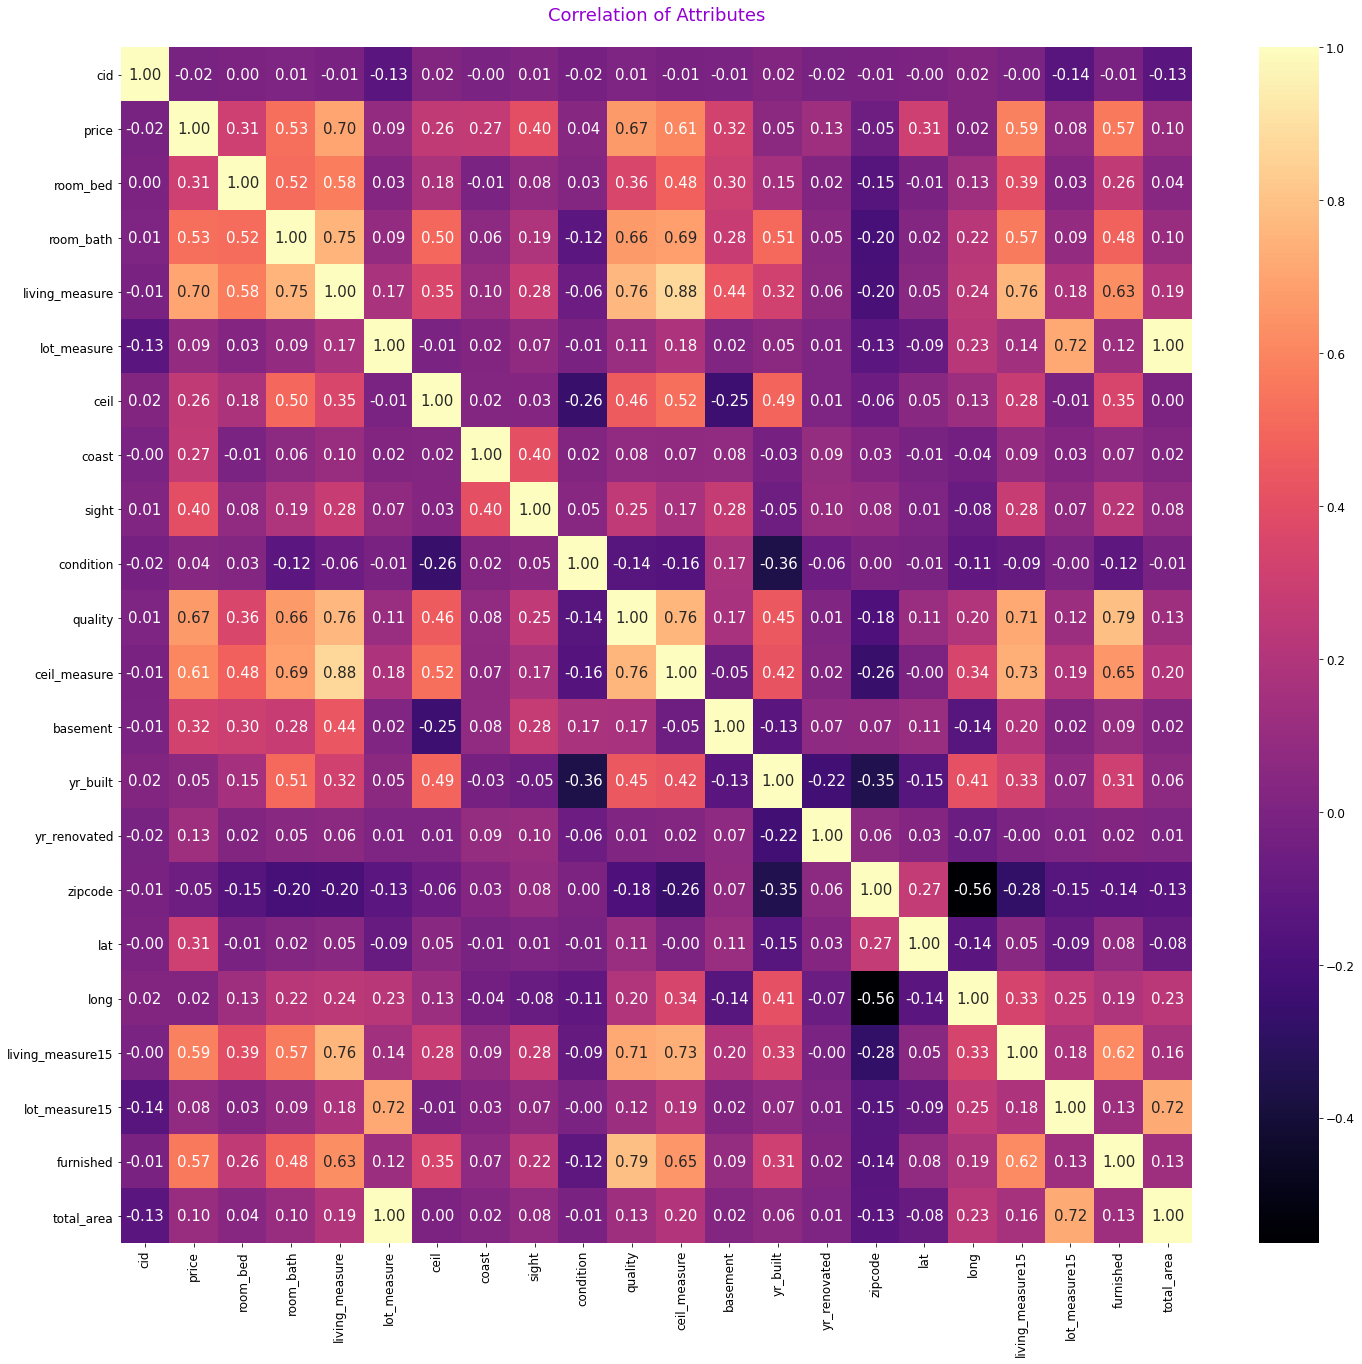

In [9]:
# Checking Correlation by plotting Heatmap for all attributes 
print('\033[1mHeatmap showing Correlation of Attributes:-')
plt.figure(figsize=(24,22))
plt.title('Correlation of Attributes\n')
sns.heatmap(House_Data.corr(), annot=True, fmt= '.2f', cmap='magma');
plt.show()

***
**Key Observations:-**
* We can observe that most of the attributes have less relation with each other.
* Attribute 'total_area' and 'lot_measure' are perfectly correlated with each other.
***

## <span style="color:#9400D3">- Univariate Analysis

The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it.

### <span style="color:#9400D3"> Creating Functions for Plotting the Quantitative and Qualitative Attributes for Univariate Analysis.

We will use these functions for easy analysis of individual attribute.

In [6]:
# Creating Plot function for Quantitative Attributes

def qnt_data(x):   
    
    # Plotting Distribution for Quantitative attribute
    print(f'\033[1mPlot Showing Distribution of Feature "{x}":-')
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of "{x}"\n')
    sns.distplot(House_Data[x],color='#9400D3');
    print('')
    plt.show()
    print('\n__________________________________________________________________________________________________\n')
    print('')
    
    # Box plot for Quantitative data
    print(f'\033[1mPlot Showing 5 point summary with outliers of Attribute "{x}":-\n')
    plt.figure(figsize=(12,6))
    plt.title(f'Box Plot for "{x}"\n')
    sns.boxplot(House_Data[x],color="#9400D3");
    plt.show()

# Creating Plot function for Qualitative Attributes

def qua_data(x):
    
    # Plotting Frequency Distribution of Qualitative attribute
    colors = ['gold','tomato','yellowgreen','#BA4A00','#ADD8E6','#00FF00','#DE3163',]
    print(f'\033[1mPlot Showing Frequency Distribution of Attribute "{x}":-')
    plt.figure(figsize=(10,8))
    plt.title(f'Frequencies of "{x}" Attribute\n')
    sns.countplot(House_Data[x],palette='bright');
    plt.show()
    print('\n___________________________________________________________________________________')
    print('')
    
    # Plotting Pie Chart to check contribution of Qualitative attribute
    print(f'\033[1m\nPie Chart Showing Contribution of Each Category of "{x}" feature:-\n')
    plt.title(f'Contribution of Each Category of "{x}" Attribute\n\n\n\n\n\n\n\n')
    House_Data[x].value_counts().plot.pie(radius=2.5,shadow=True,autopct='%1.1f%%',colors=colors);
    plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
    plt.show()

***
**Key Observations:-**
* By creating these functions we can easily do the further plotting process.
***

### Attribute 1: Price

Plot Showing Distribution of Feature "price":-



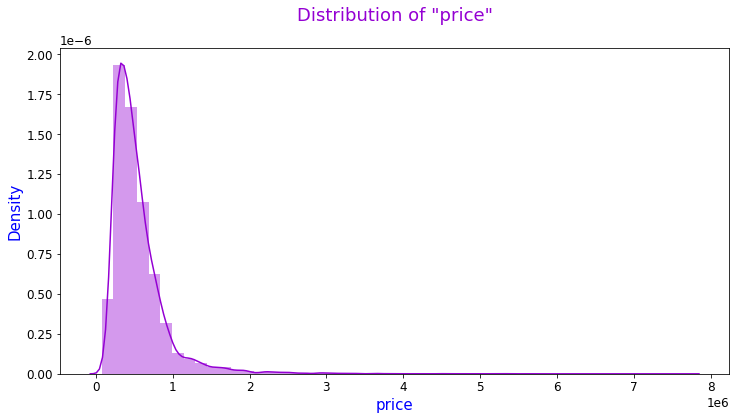


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "price":-



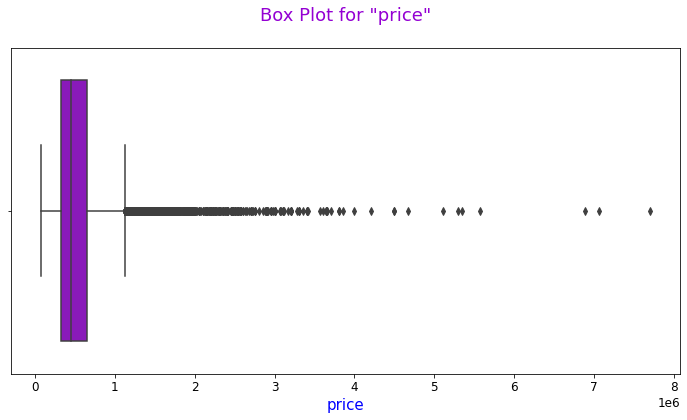

In [11]:
# Univariate analysis for Price Attribute
qnt_data('price')

***
**Key Observations:-**
* This attribute is positively skewed.
* Mean of the attribute is greater than the mode of hence distribution is positively skewed
* Outliers are found in this attribute.
***

### Attribute 2: Living_Measure

Plot Showing Distribution of Feature "living_measure":-



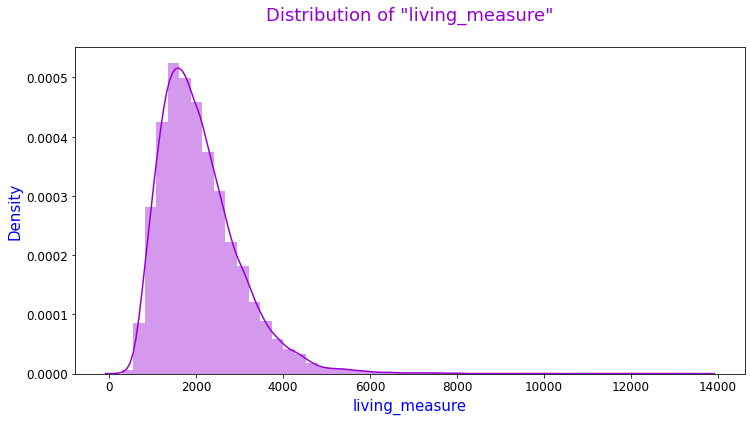


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "living_measure":-



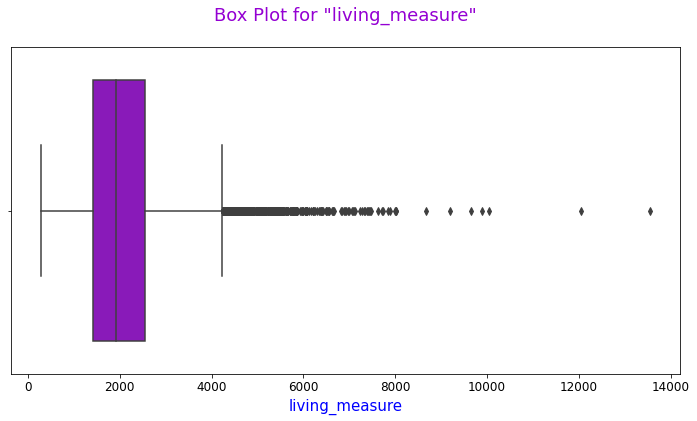

In [12]:
# Univariate analysis for living_measure Attribute
qnt_data('living_measure')

***
**Key Observations:-**
* This attribute is positively skewed.
* Outliers are found in this attribute.
***

### Attribute 3: Lot_Measure

Plot Showing Distribution of Feature "lot_measure":-



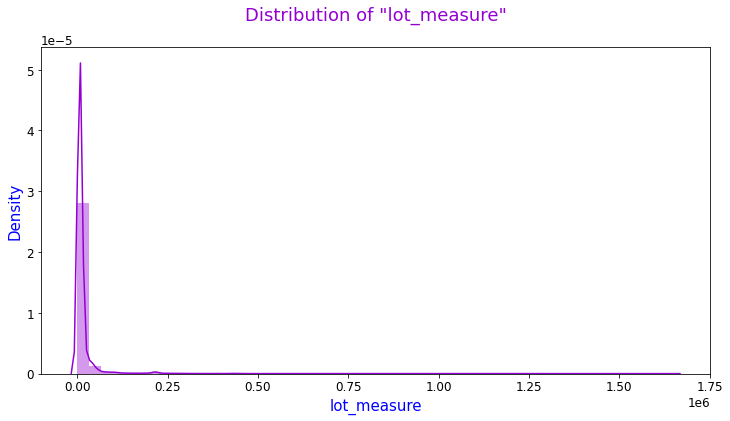


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "lot_measure":-



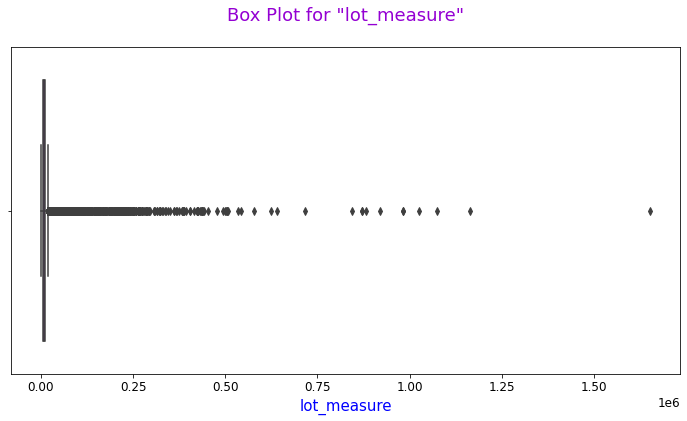

In [13]:
# Univariate analysis for lot_measure Attribute
qnt_data('lot_measure')

***
**Key Observations:-**
* This attribute is highly positively skewed.
* Lots of outliers are found in this attribute.
***

### Attribute 4: Ceil_Measure

Plot Showing Distribution of Feature "ceil_measure":-



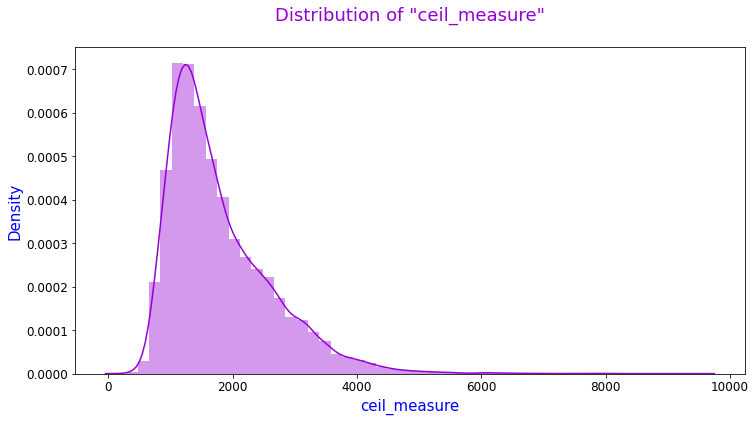


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "ceil_measure":-



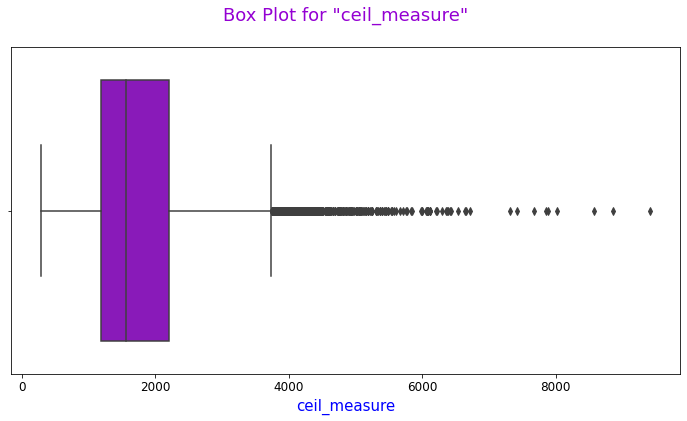

In [14]:
# Univariate analysis for ceil_measure Attribute
qnt_data('ceil_measure')

***
**Key Observations:-**
* This attribute is positively skewed.
* Outliers are found in this attribute.
***

### Attribute 5: Lat

Plot Showing Distribution of Feature "lat":-



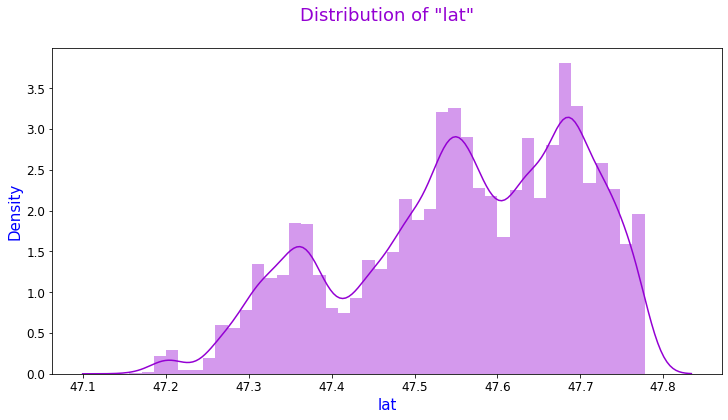


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "lat":-



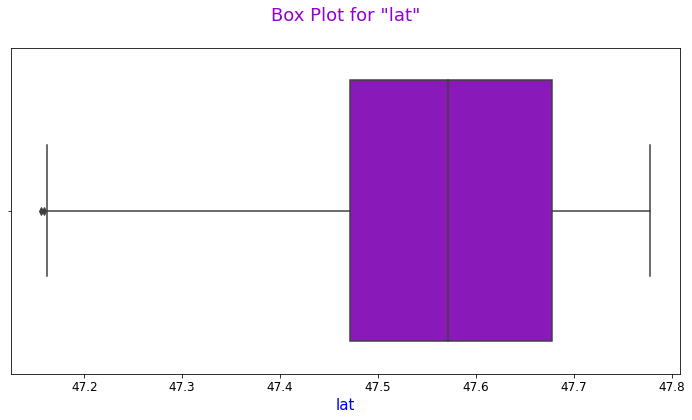

In [15]:
# Univariate analysis for lat Attribute
qnt_data('lat')

***
**Key Observations:-**
* This attribute is negatively skewed.
* Few outliers are found in this attribute.
***

### Attribute 6: Long

Plot Showing Distribution of Feature "long":-



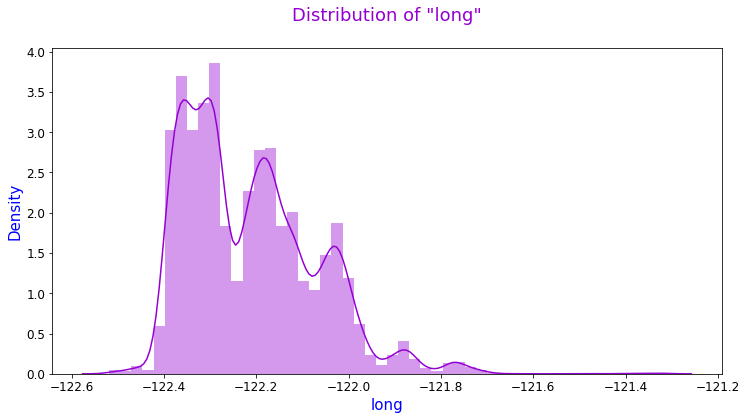


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "long":-



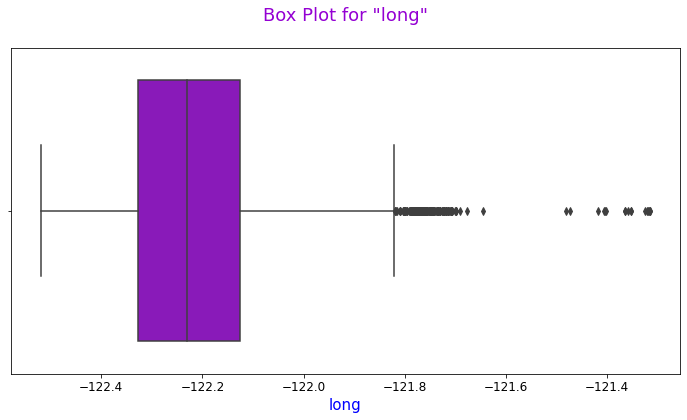

In [16]:
# Univariate analysis for long Attribute
qnt_data('long')

***
**Key Observations:-**
* This attribute is positively skewed.
* Outliers are found in this attribute.
***

### Attribute 7: Living_measure15

Plot Showing Distribution of Feature "living_measure15":-



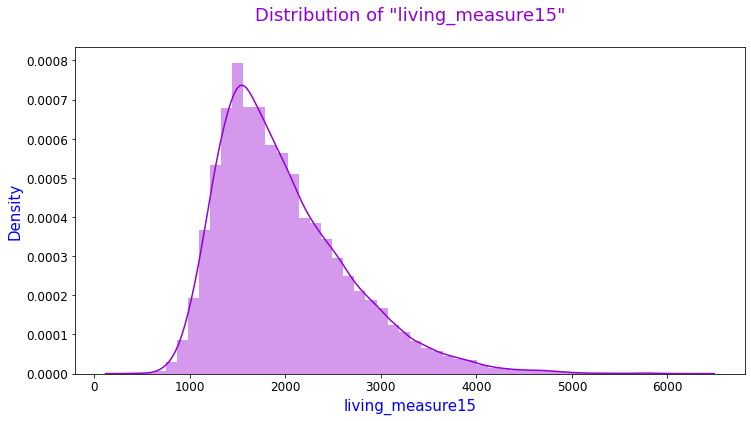


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "living_measure15":-



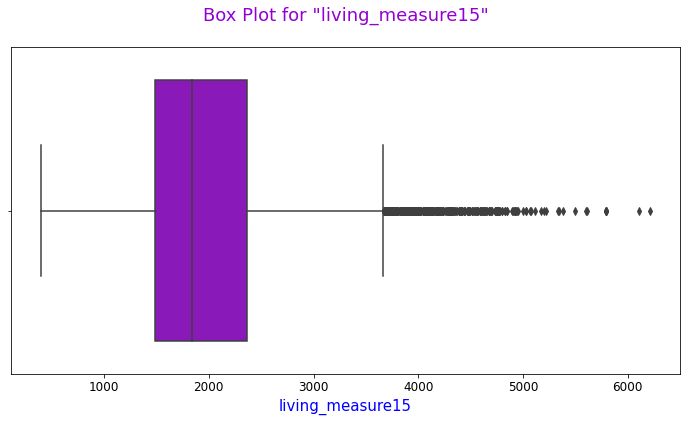

In [17]:
# Univariate analysis for Living_measure15 Attribute
qnt_data('living_measure15')

***
**Key Observations:-**
* This attribute is bit positively skewed.
* Outliers are found in this attribute.
***

### Attribute 8: Lot_measure15

Plot Showing Distribution of Feature "lot_measure15":-



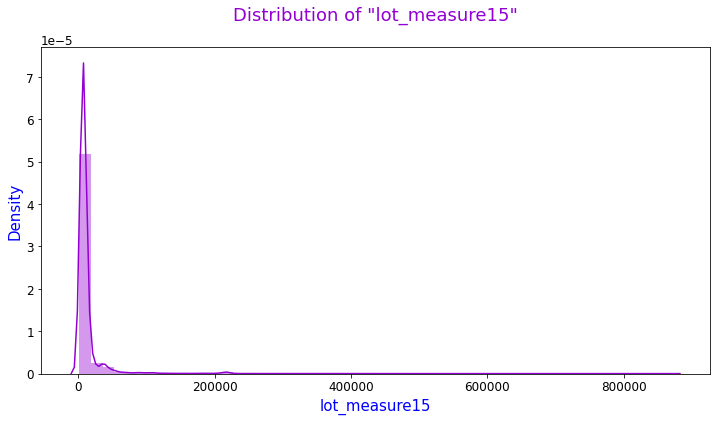


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "lot_measure15":-



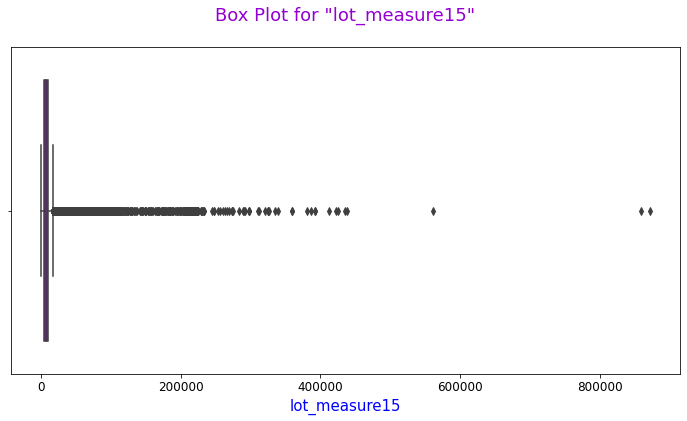

In [18]:
# Univariate analysis for Lot_measure15 Attribute
qnt_data('lot_measure15')

***
**Key Observations:-**
* This attribute is highly positively skewed.
* Outliers are found in this attribute.
***

### Attribute 9: Total_Area

Plot Showing Distribution of Feature "total_area":-



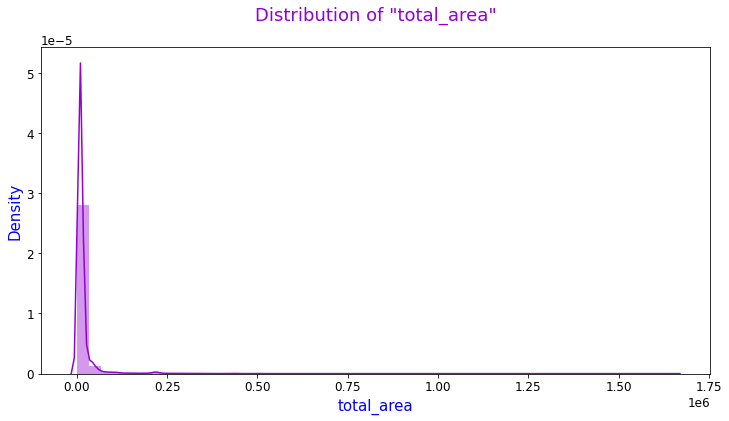


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "total_area":-



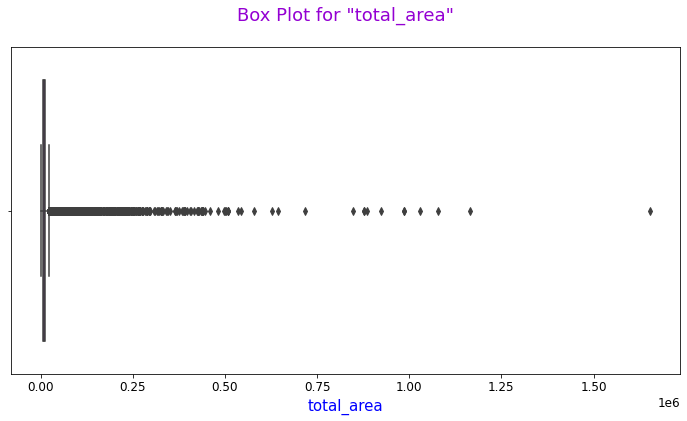

In [19]:
# Univariate analysis for total_area Attribute
qnt_data('total_area')

***
**Key Observations:-**
* This attribute is highly positively skewed.
* Outliers are found in this attribute.
***

### Attribute 10: Yr_Built

Plot Showing Distribution of Feature "yr_built":-



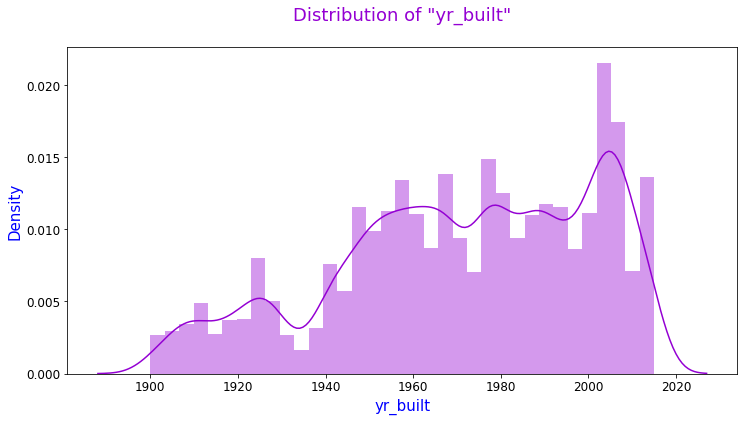


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "yr_built":-



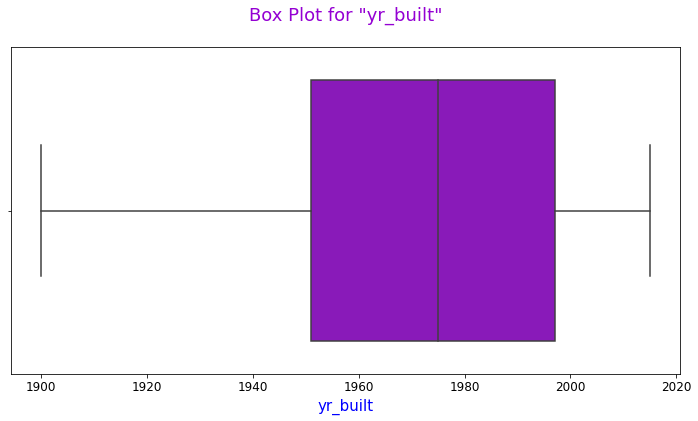

In [20]:
# Univariate analysis for yr_built Attribute
qnt_data('yr_built')

***
**Key Observations:-**
* This attribute is negatively skewed.
* Outliers are not found in this attribute.
***

### Attribute 11: Yr_Renovated

Plot Showing Distribution of Feature "yr_renovated":-



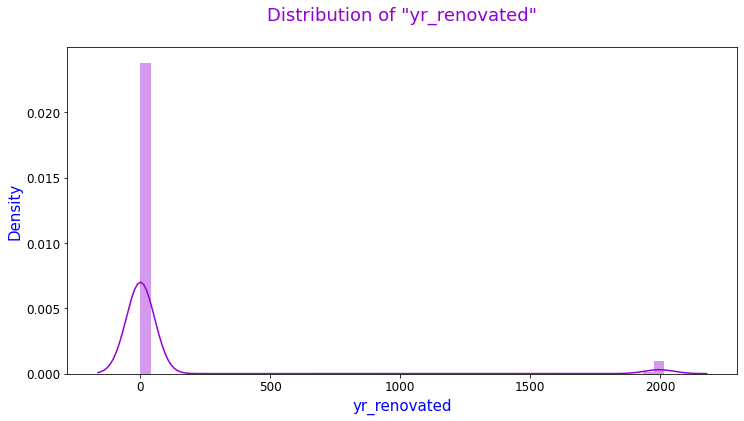


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "yr_renovated":-



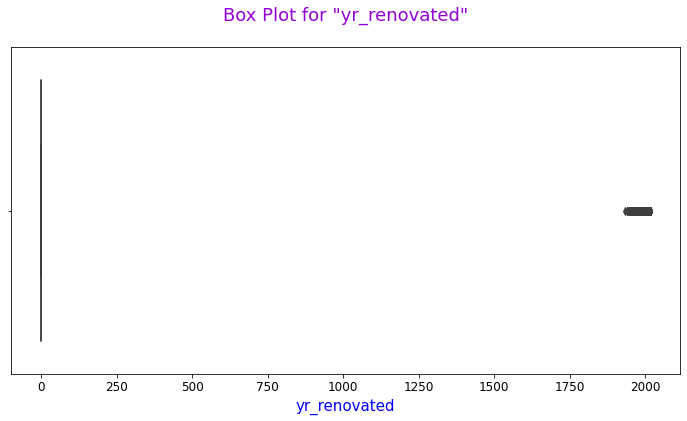

In [21]:
# Univariate analysis for yr_renovated Attribute
qnt_data('yr_renovated')

***
**Key Observations:-**
* This attribute is highly positively skewed.
* Outliers are found in this attribute.
***

### Attribute 12: Basement

Plot Showing Distribution of Feature "basement":-



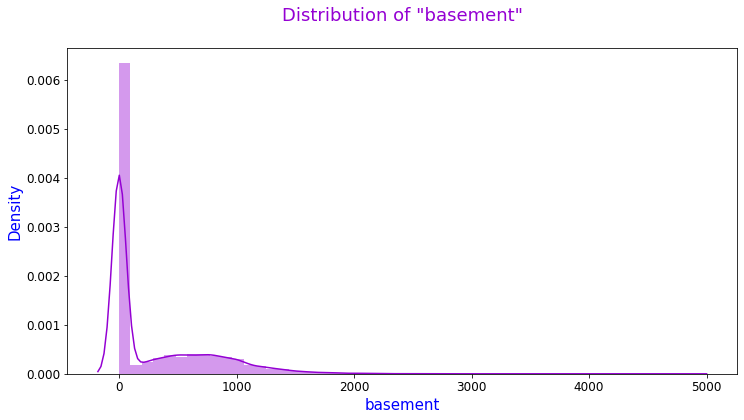


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "basement":-



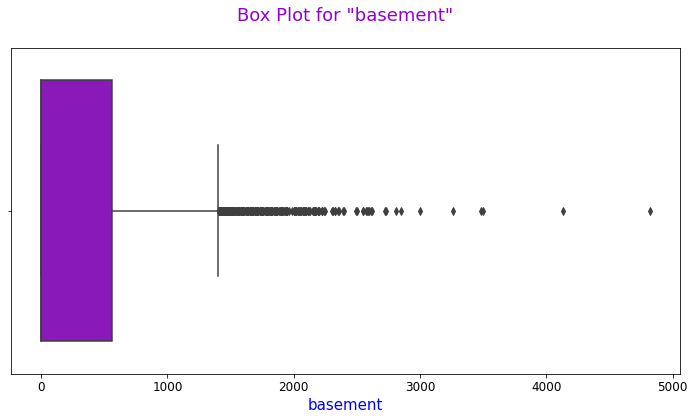

In [22]:
# Univariate analysis for basement Attribute
qnt_data('basement')

***
**Key Observations:-**
* This attribute is positively skewed.
* Outliers are found in this attribute.
***

### Attribute 13: Coast

Plot Showing Frequency Distribution of Attribute "coast":-


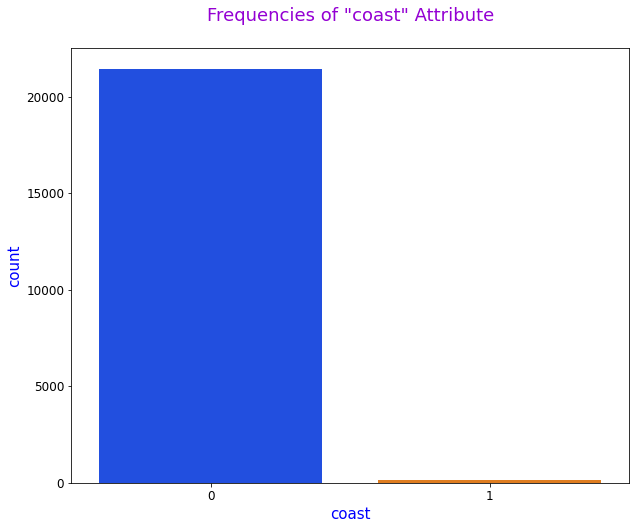


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "coast" feature:-



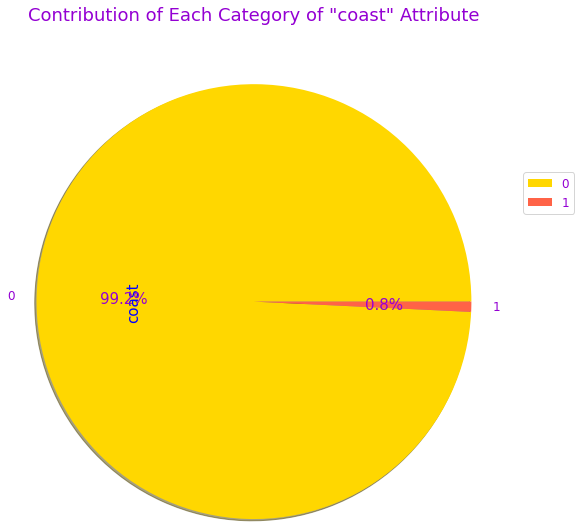

In [23]:
# Univariate analysis for coast Attribute
qua_data('coast')

***
**Key Observations:-**
* coast 0 is dominating the data by covering 99.2% of the data.
***

### Attribute 14: Sight

Plot Showing Frequency Distribution of Attribute "sight":-


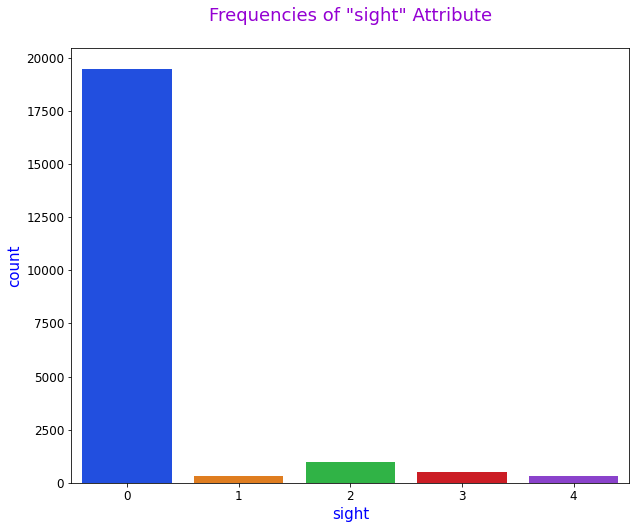


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "sight" feature:-



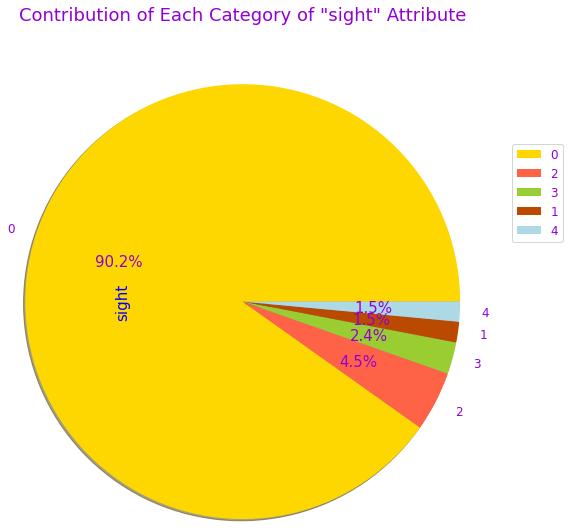

In [24]:
# Univariate analysis for Sight Attribute
qua_data('sight')

***
**Key Observations:-**
* Sight 0 is dominating the data by covering 90.2% of the data
***

### Attribute 15: Furnished

Plot Showing Frequency Distribution of Attribute "furnished":-


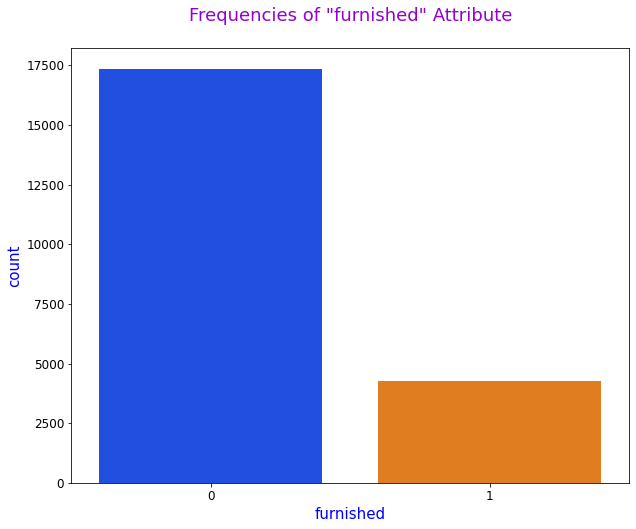


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "furnished" feature:-



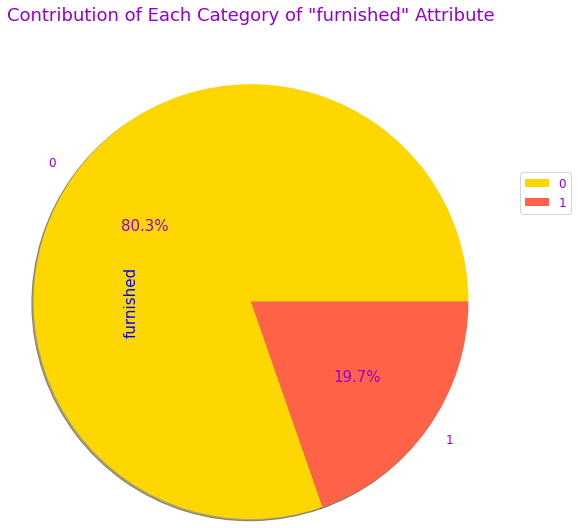


0 = Un-furnished
1 = Furnished


In [25]:
# Univariate analysis for furnished Attribute
qua_data('furnished')
print('\n\033[1m0 = Un-furnished\n1 = Furnished')

***
**Key Observations:-**
* Un-furnished is dominating data by covering 80.3% of the data. 
* Rest of the data represent Furnished.
***

### Attribute 16: Room_bed

Plot Showing Frequency Distribution of Attribute "room_bed":-


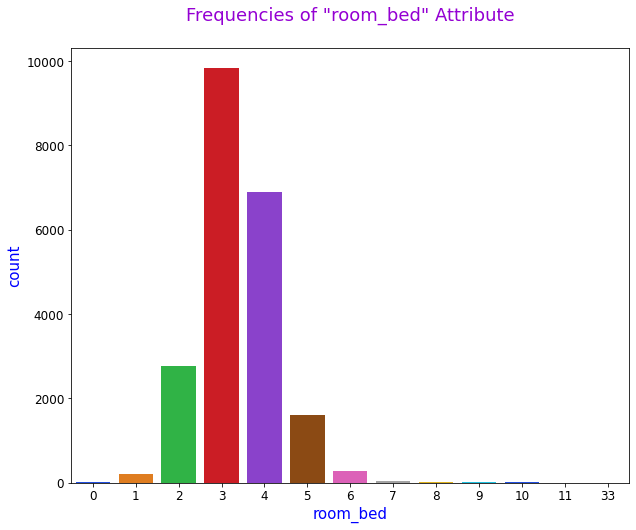


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "room_bed" feature:-



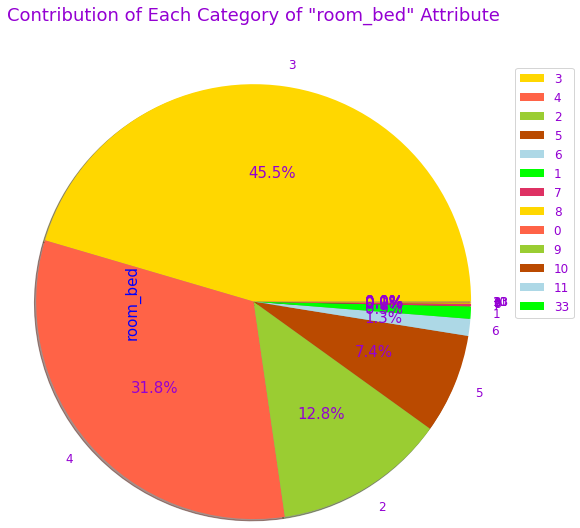

In [26]:
# Univariate analysis for room_bed Attribute
qua_data('room_bed')

***
**Key Observations:-**
* room_bed with value 3 dominating data by 45.5%
* 31.8% data covered by room_bed for value 4 (here value represent number of bedrooms/house)
* 12.8% data covered with count of 2 bedrooms per house.
* 7.4% data covered with count of 5 bedrooms per house.
***

### Attribute 17: Room_bath

Plot Showing Frequency Distribution of Attribute "room_bath":-


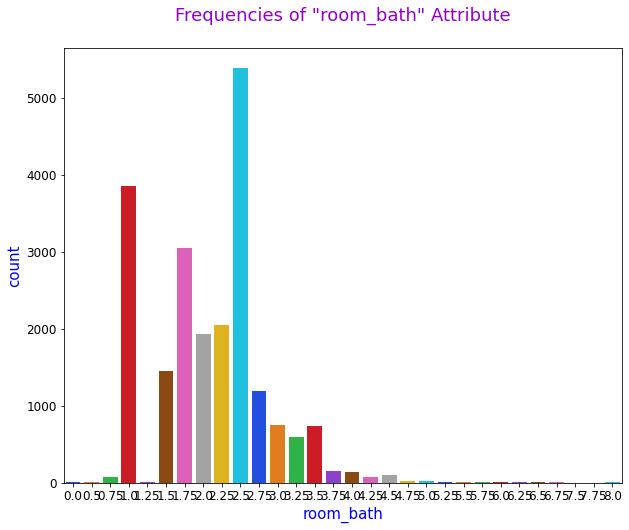


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "room_bath" feature:-



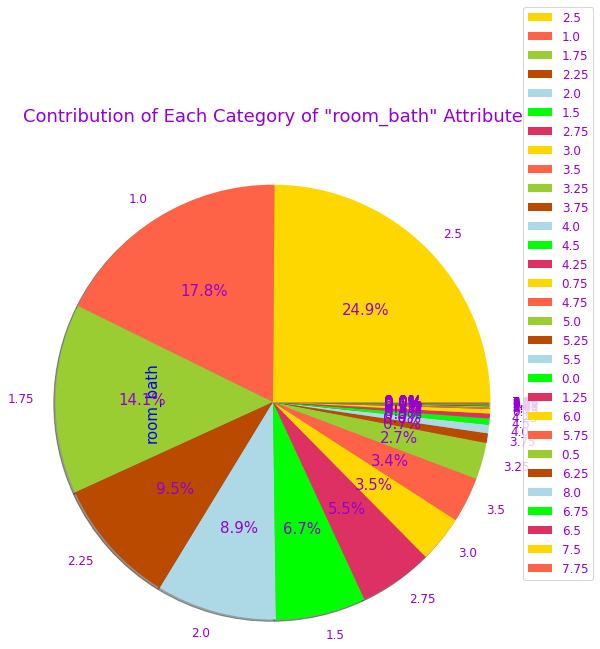

In [27]:
# Univariate analysis for room_bath Attribute
qua_data('room_bath')

***
**Key Observations:-**
* 24.9% data covered for room_bath with value 2.5 which is highest among all.
***

### Attribute 18: Ceil

Plot Showing Frequency Distribution of Attribute "ceil":-


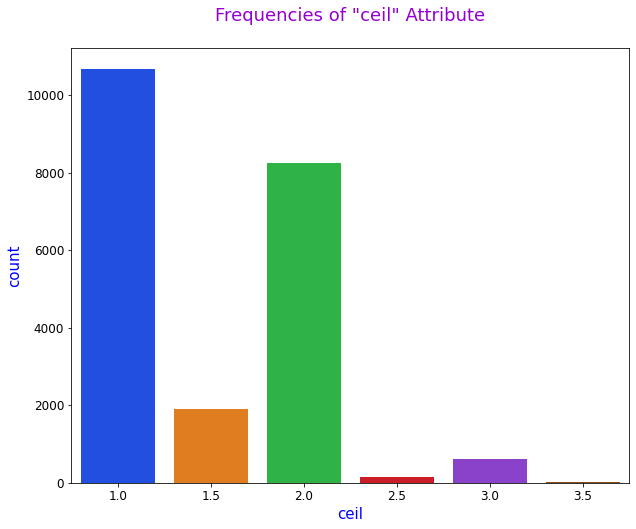


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "ceil" feature:-



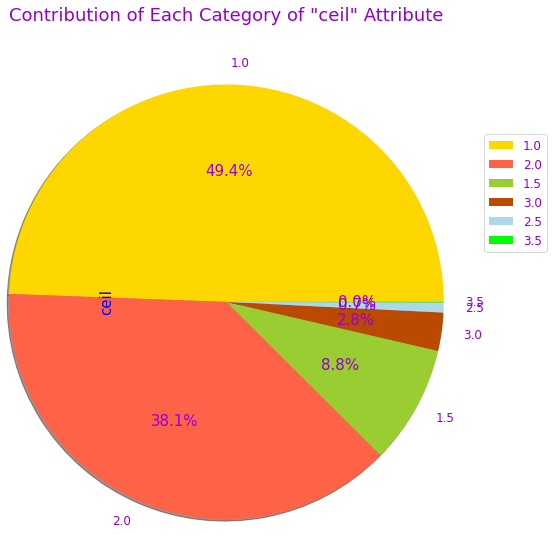

In [28]:
# Univariate analysis for ceil Attribute
qua_data('ceil')

***
**Key Observations:-**
* ceil 1.0 is dominating data by covering 49.4% of the data.
***

### Attribute 19: Condition

Plot Showing Frequency Distribution of Attribute "condition":-


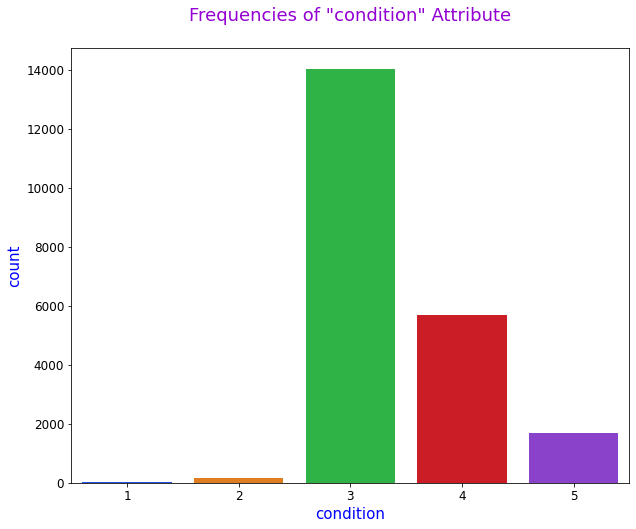


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "condition" feature:-



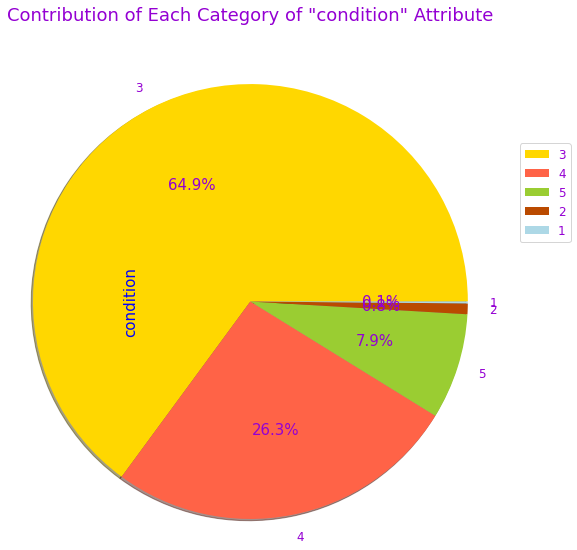

In [29]:
# Univariate analysis for condition Attribute
qua_data('condition')

***
**Key Observations:-**
* condition 3 is dominating data by covering 64.9% of the data.
***

### Attribute 20: Quality

Plot Showing Frequency Distribution of Attribute "quality":-


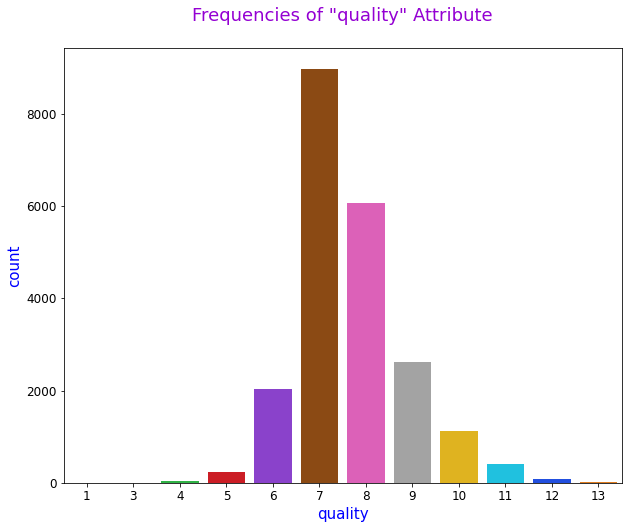


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of "quality" feature:-



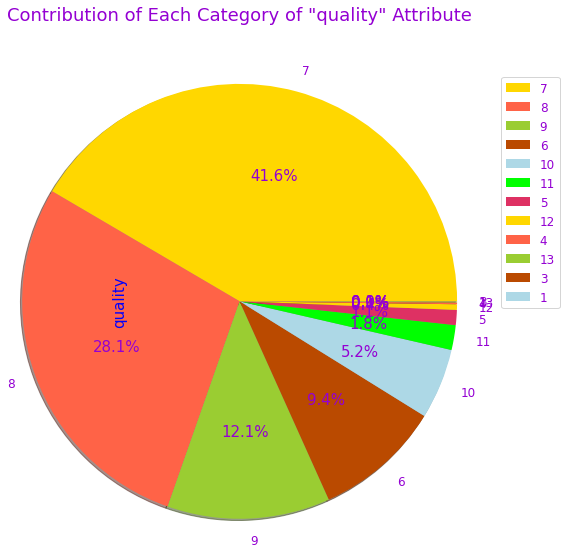

In [30]:
# Univariate analysis for quality Attribute
qua_data('quality')

***
**Key Observations:-**
* quality 7 is dominating data by covering 41.6% of the data.
***

## <span style="color:#9400D3">- Bivariate Analysis
   
* Bivariate Analysis is performed to find the relationship between Quantitative Variable and Qualitative variable of dataset. 

* To do analysis here we are using Violin plots because Violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region.

#### <span style="color:#9400D3"> Creating Functions for Plotting the Quantitative VS Categorical Data for Bivariate Analysis
   
By this function we can do our analysis easily.

In [31]:
# Creating Plot function for Qualitative VS All Quantitative Attribute

def bi_Anly(x):    
    
    # Bivariate Analysis for Qualitative VS All Quantitative Attributes
    print(f'\033[1m\nPlots Showing Bivariate Analysis of "{x}" VS All Quantitative Attributes:-\n')

    # Setting up Sub-Plots
    fig, axes = plt.subplots(6, 2, figsize=(24, 30))
    fig.suptitle(f'"{x}" VS All Quantitative Attributes')
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

    # Plotting Sub-Plots
    sns.violinplot(ax=axes[0, 0], x=x, y='yr_built', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[0, 1], x=x, y='yr_renovated', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[1, 0], x=x, y='basement', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[1, 1], x=x, y='price', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[2, 0], x=x, y='living_measure', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[2, 1], x=x, y='lot_measure', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[3, 0], x=x, y='ceil_measure', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[3, 1], x=x, y='lat', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[4, 0], x=x, y='long', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[4, 1], x=x, y='living_measure15', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[5, 0], x=x, y='lot_measure15', data=House_Data, palette='bright');
    sns.violinplot(ax=axes[5, 1], x=x, y='total_area', data=House_Data, palette='bright');

    plt.show()

### Bivariate Analysis 1: 'room_bed' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "room_bed" VS All Quantitative Attributes:-



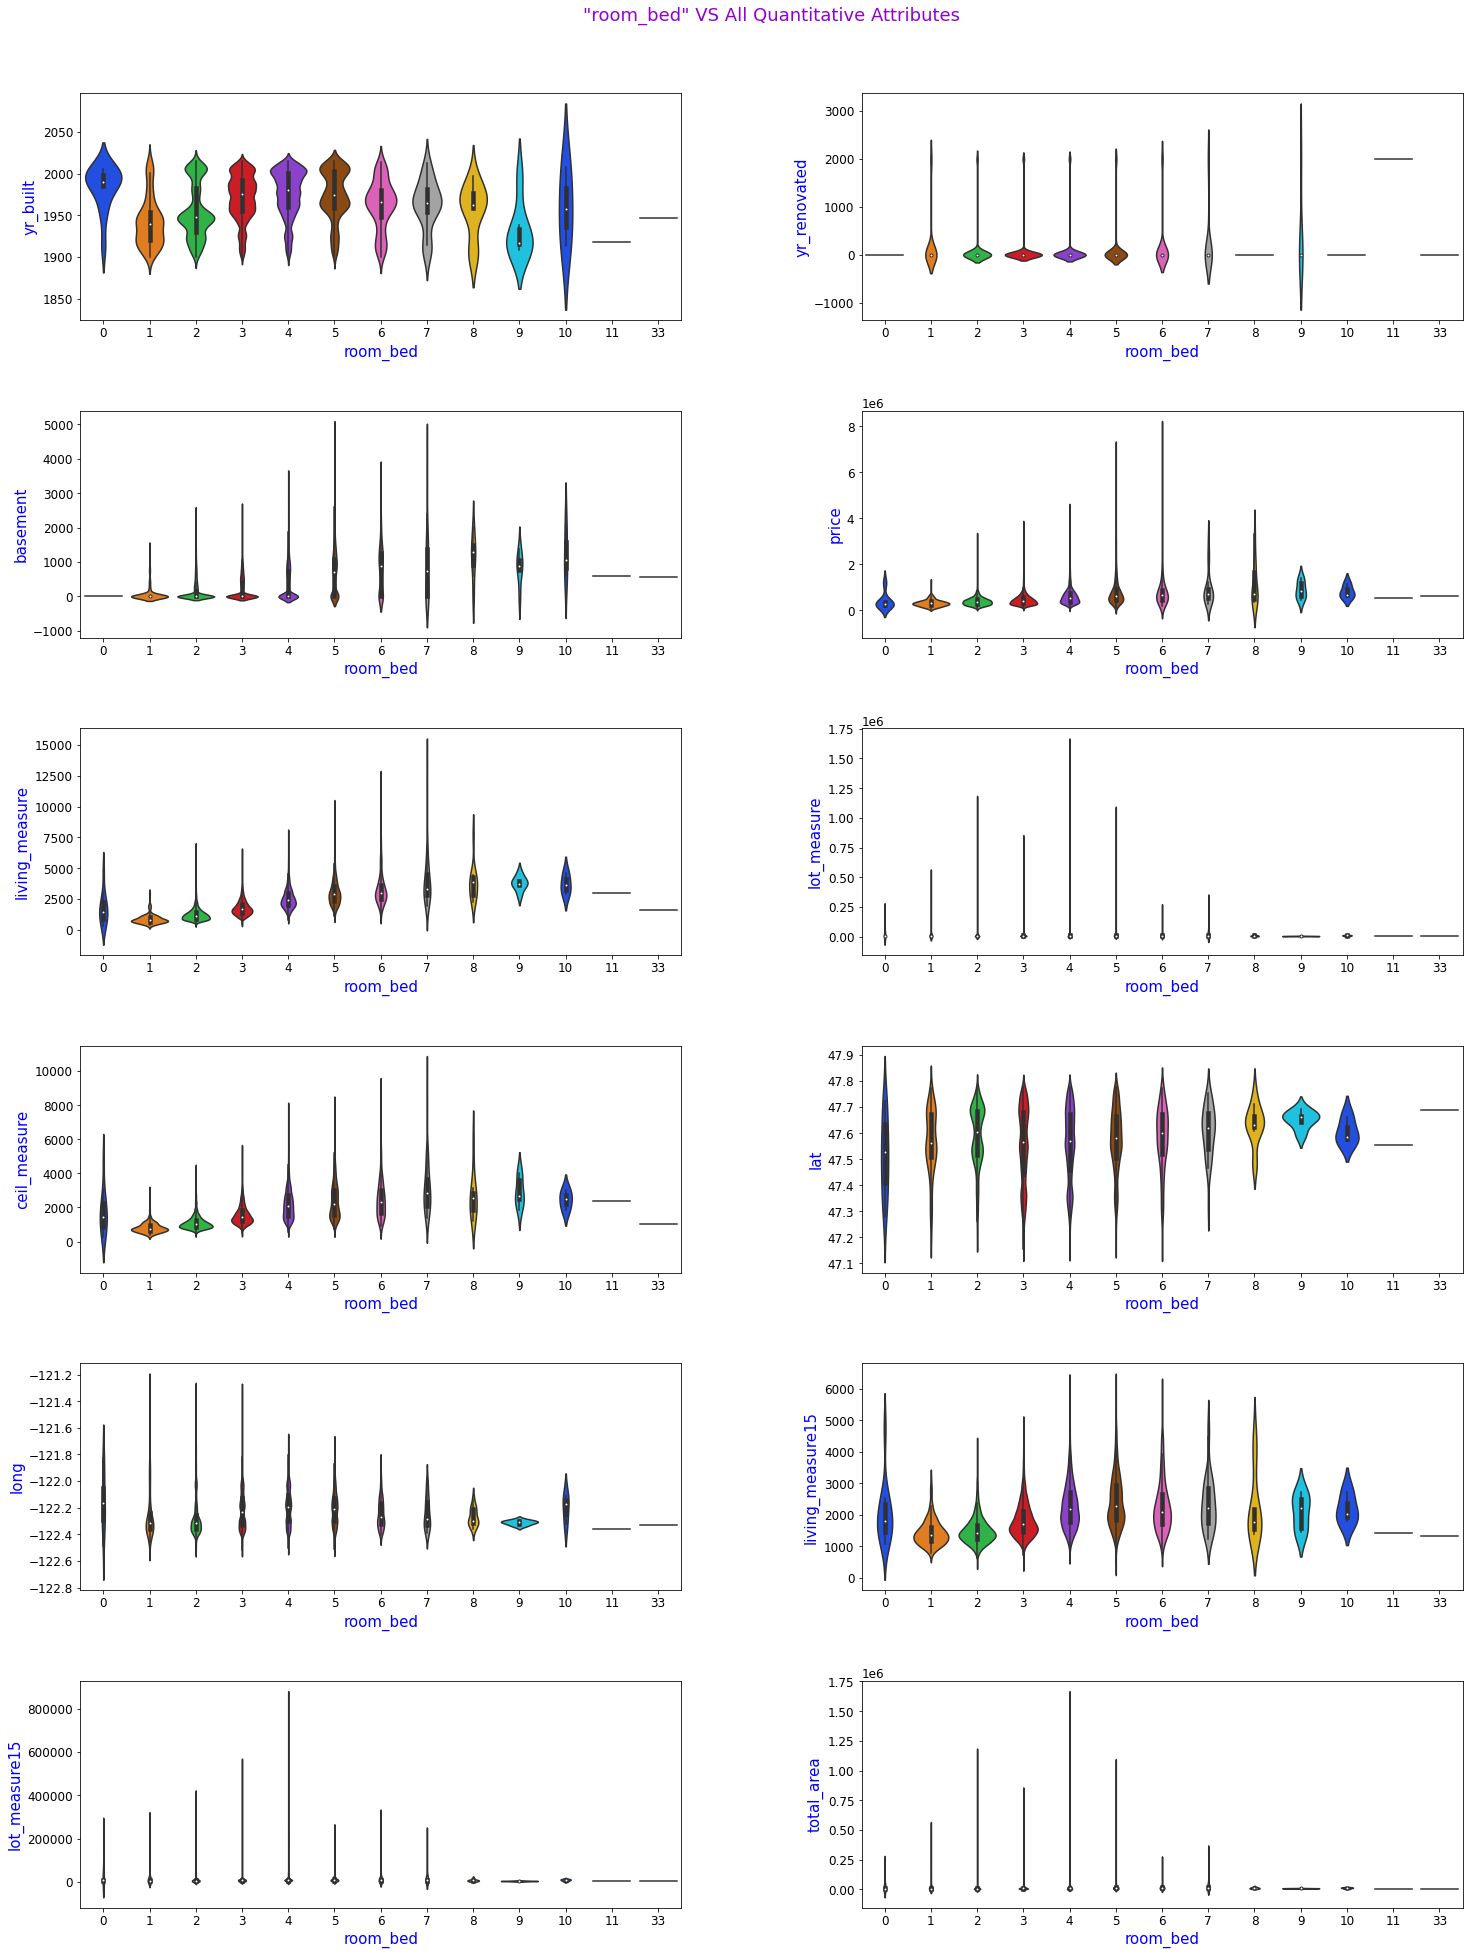

In [32]:
# Bivariate Analysis for 'room_bed' VS all Quantitative attributes
bi_Anly('room_bed')

***
**Key Observations:-**
* Violin plot well explained 5 number summary i.e. median, IQR, Probability density of the varible
* yr_built is very well distributed against room_bed for value 10.
***

### Bivariate Analysis 2: 'ceil' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "ceil" VS All Quantitative Attributes:-



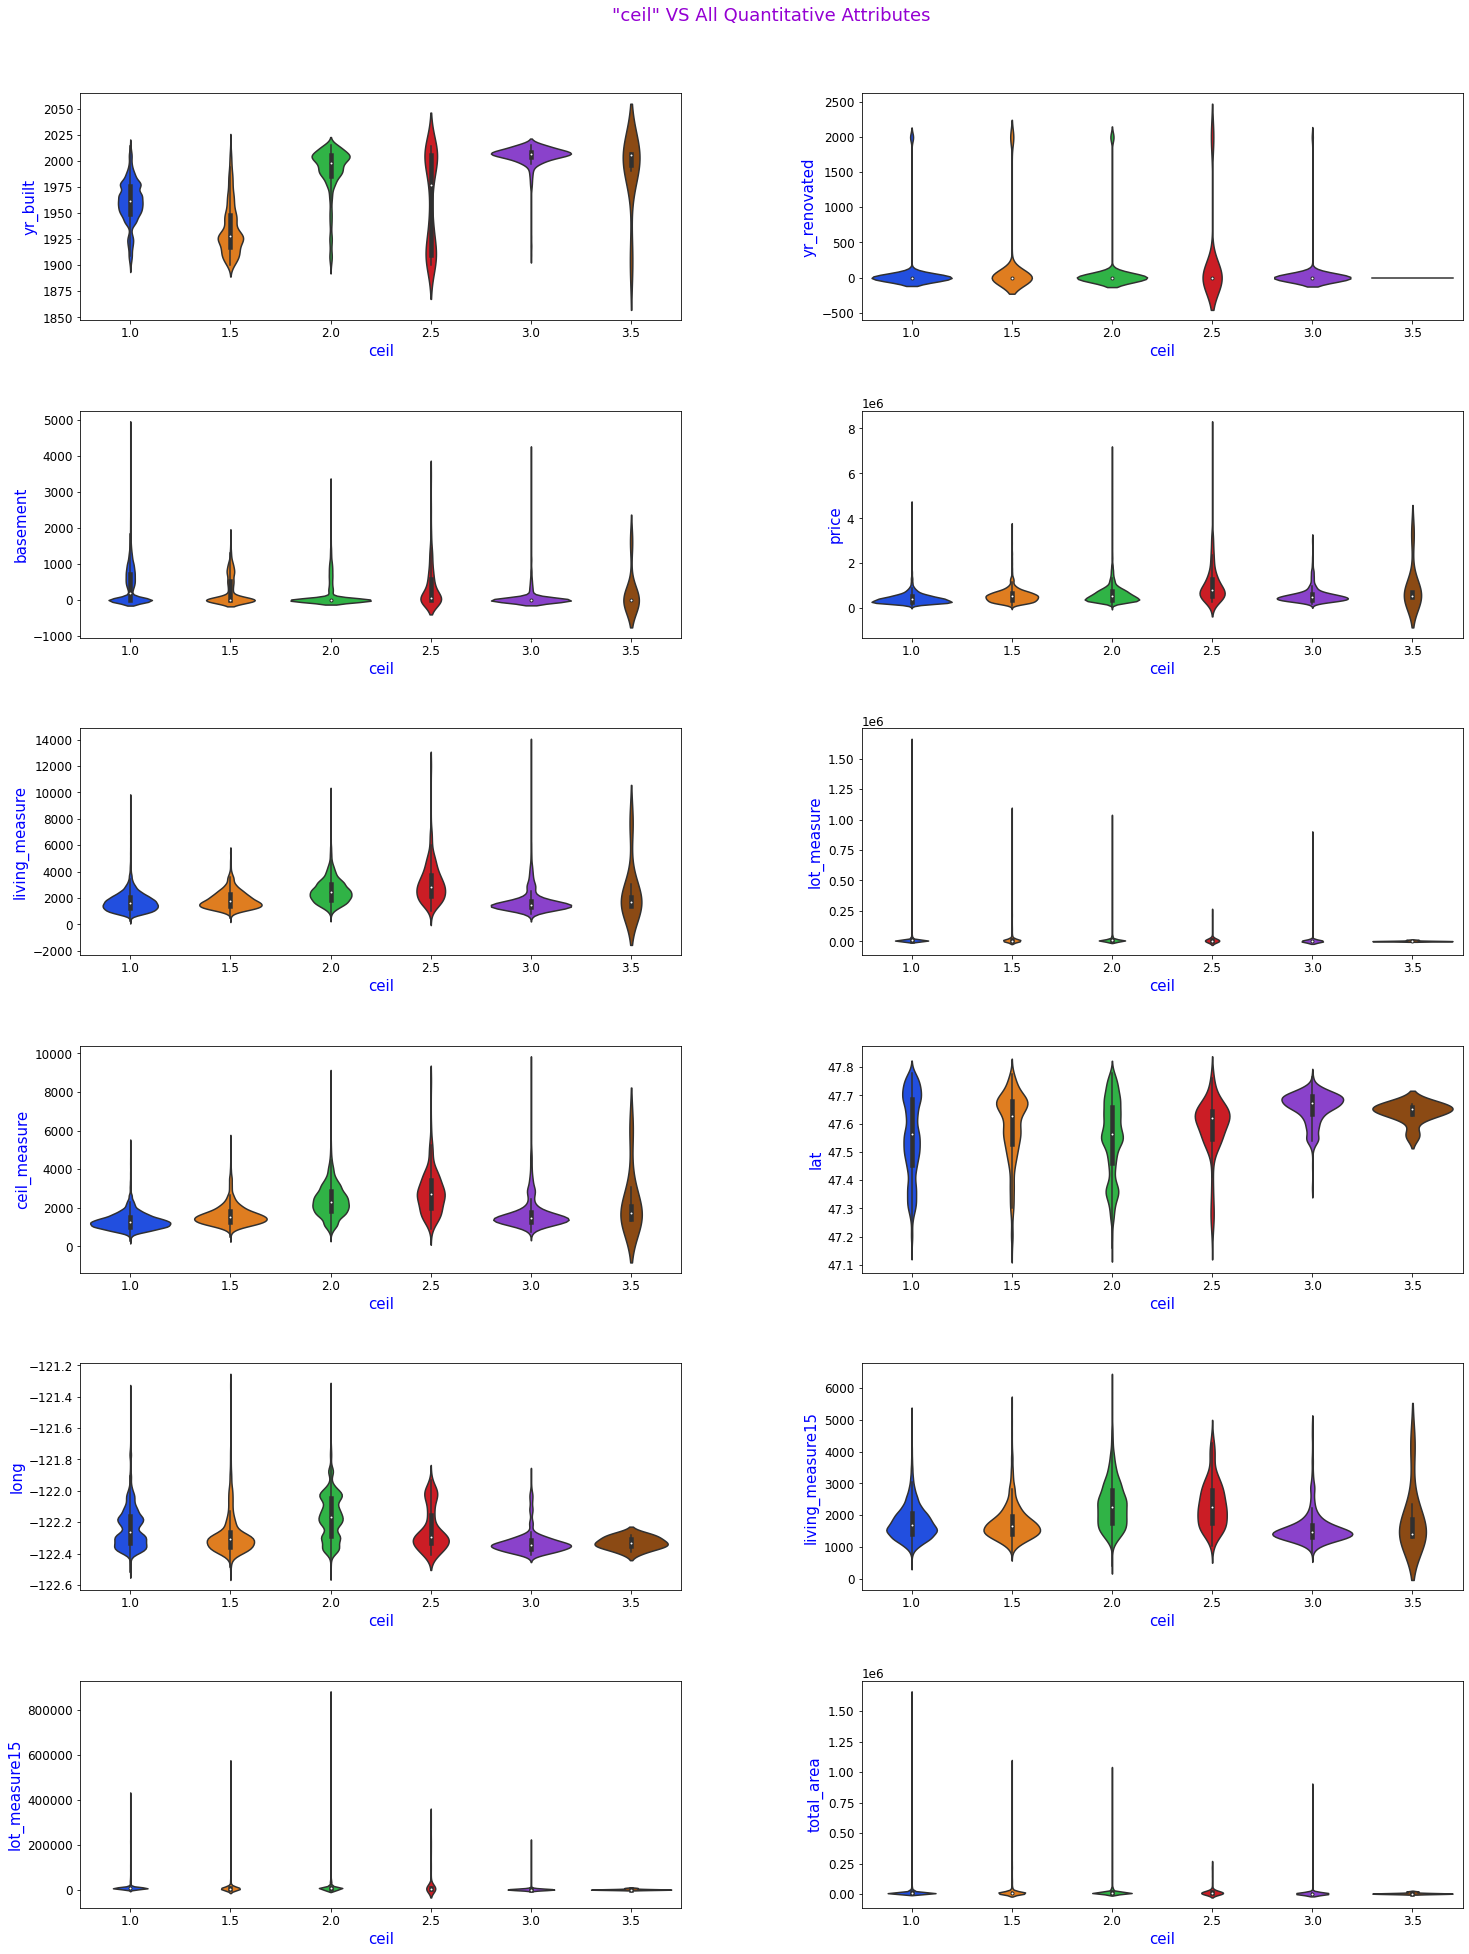

In [33]:
# Bivariate Analysis for 'ceil' VS all Quantitative attributes
bi_Anly('ceil')

***
**Key Observations:-**
* ceil 2.5 having maximum range of price as shown in above plot.
* lot_measure having high range with ceil value 1.
***

### Bivariate Analysis 3: 'condition' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "condition" VS All Quantitative Attributes:-



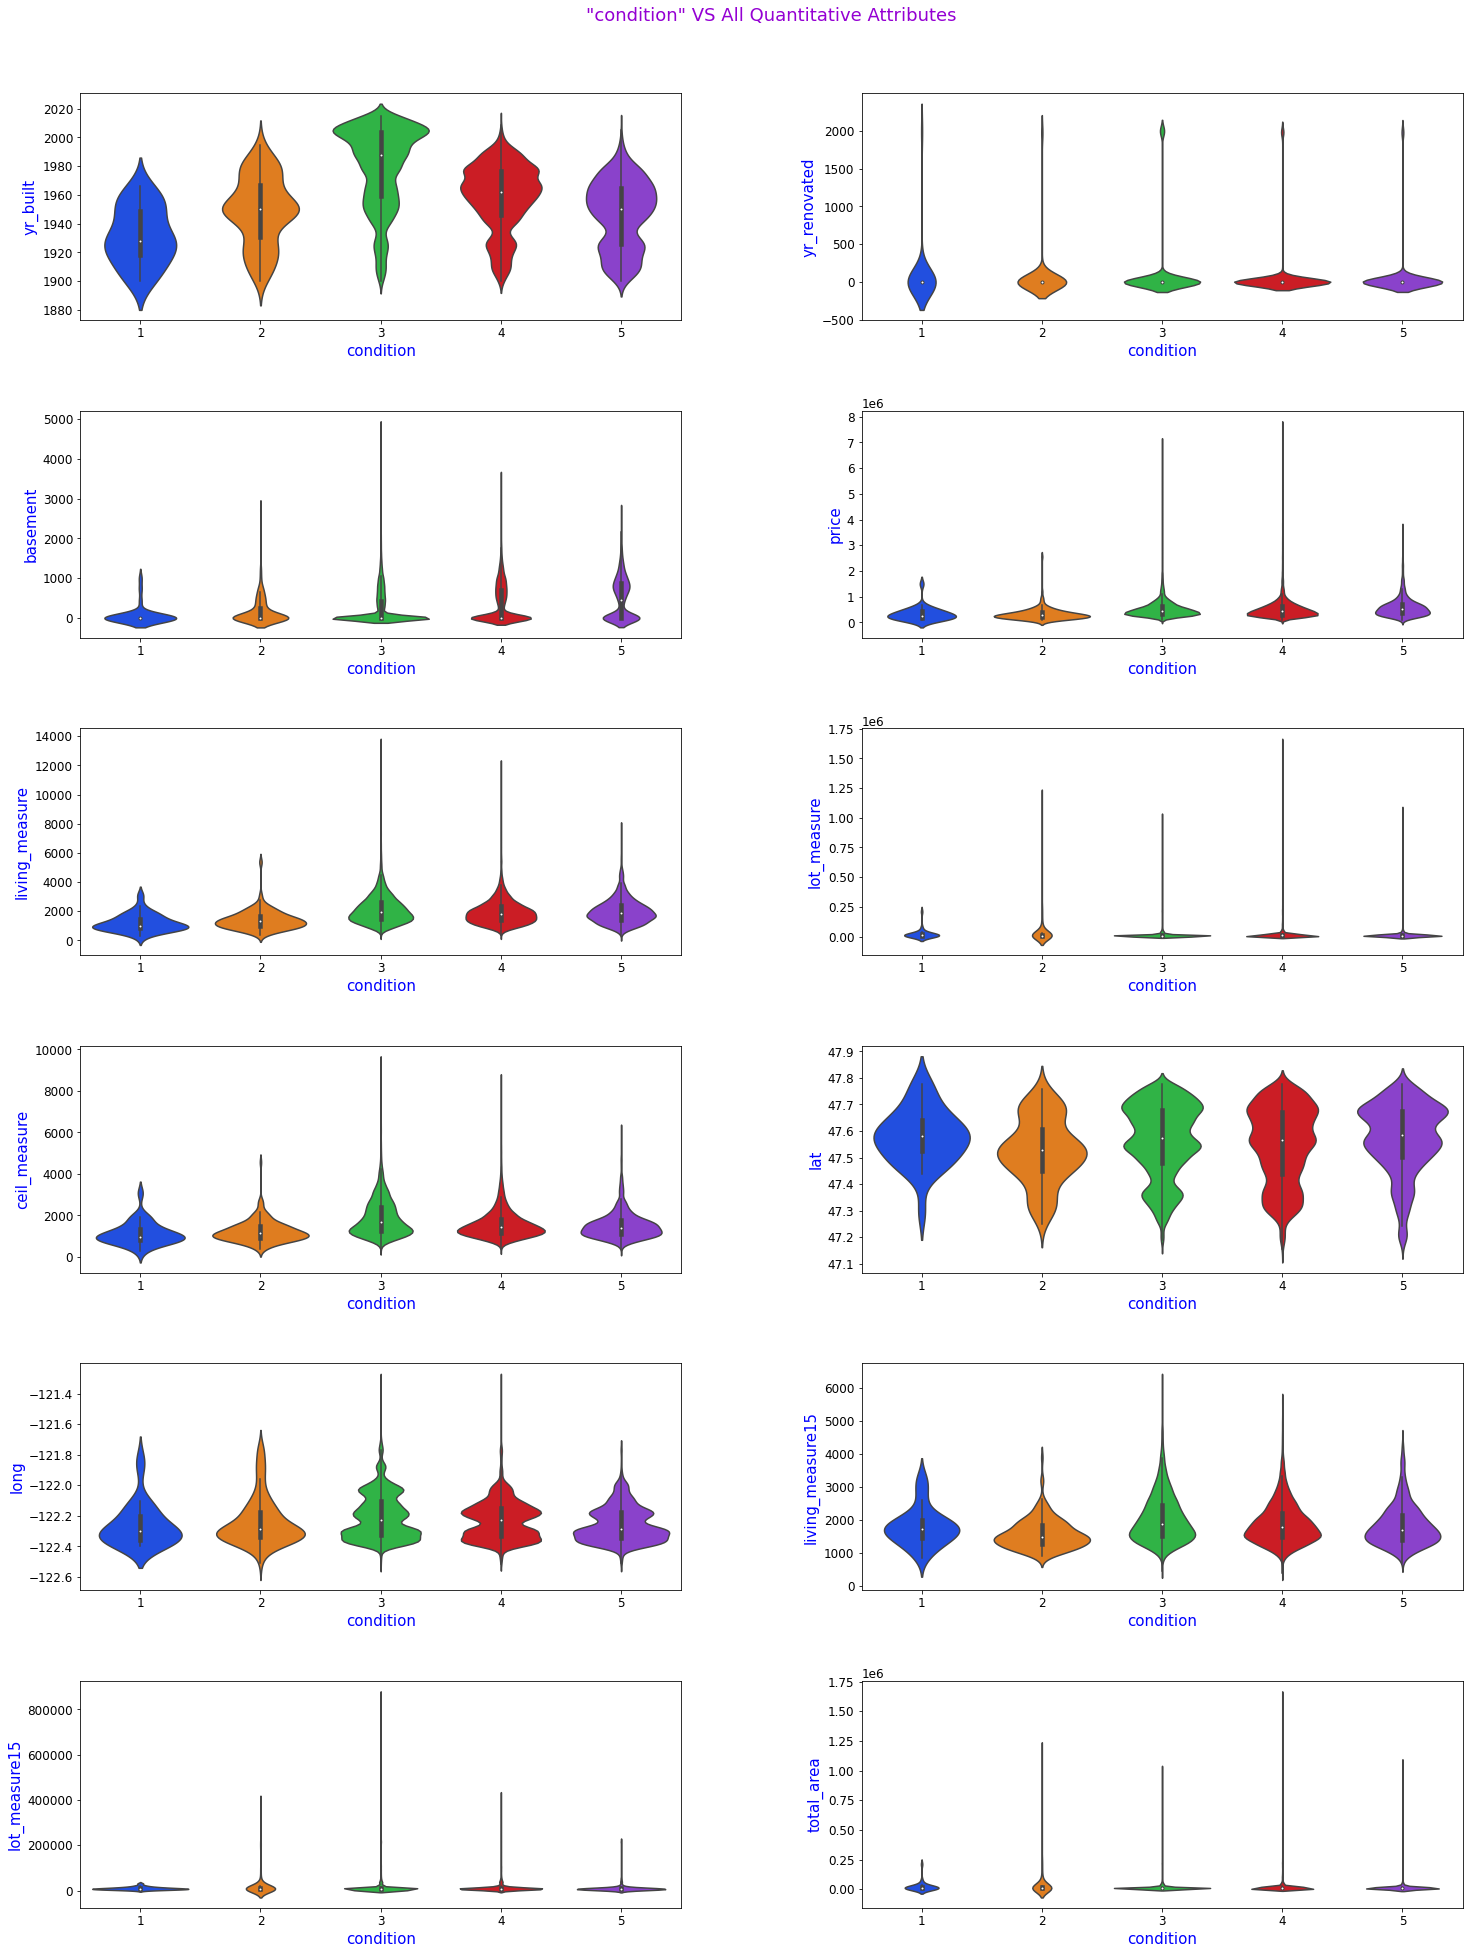

In [34]:
# Bivariate Analysis for 'condition' VS all Quantitative attributes
bi_Anly('condition')

***
**Key Observations:-**
* condition 4 has max range of price.
* condition 3 has max range of living_measure.
***

### Bivariate Analysis 4: 'quality' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "quality" VS All Quantitative Attributes:-



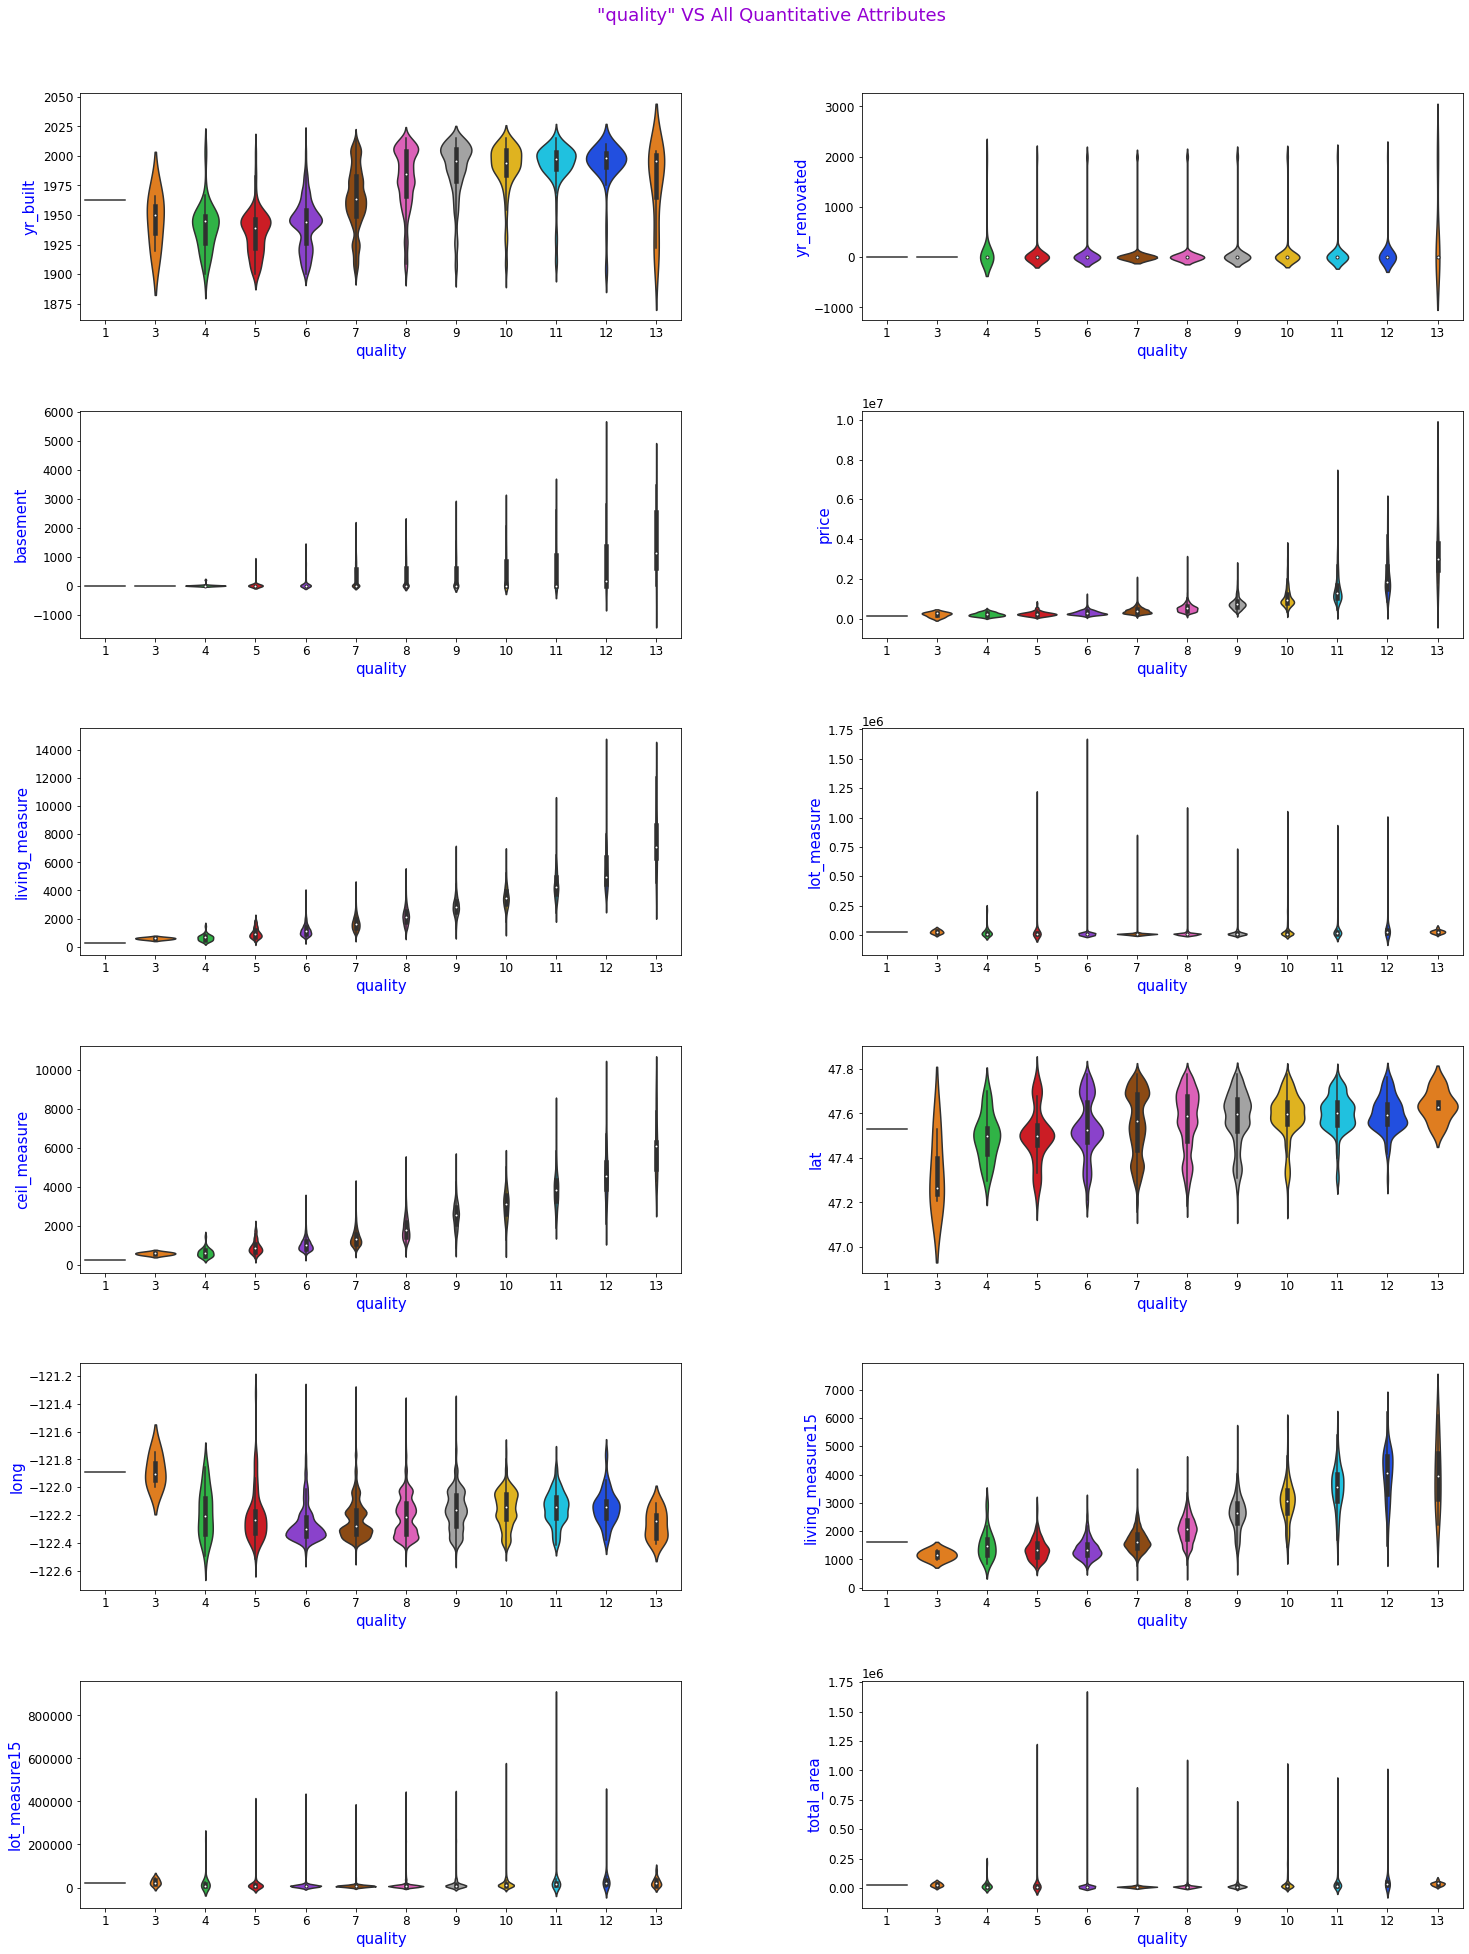

In [35]:
# Bivariate Analysis for 'quality' VS all Quantitative attributes
bi_Anly('quality')

***
**Key Observations:-**
* quality with value 6 has max range of total_area.
* quality with value 13 has max range of price.
***

### Bivariate Analysis 5: 'coast' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "coast" VS All Quantitative Attributes:-



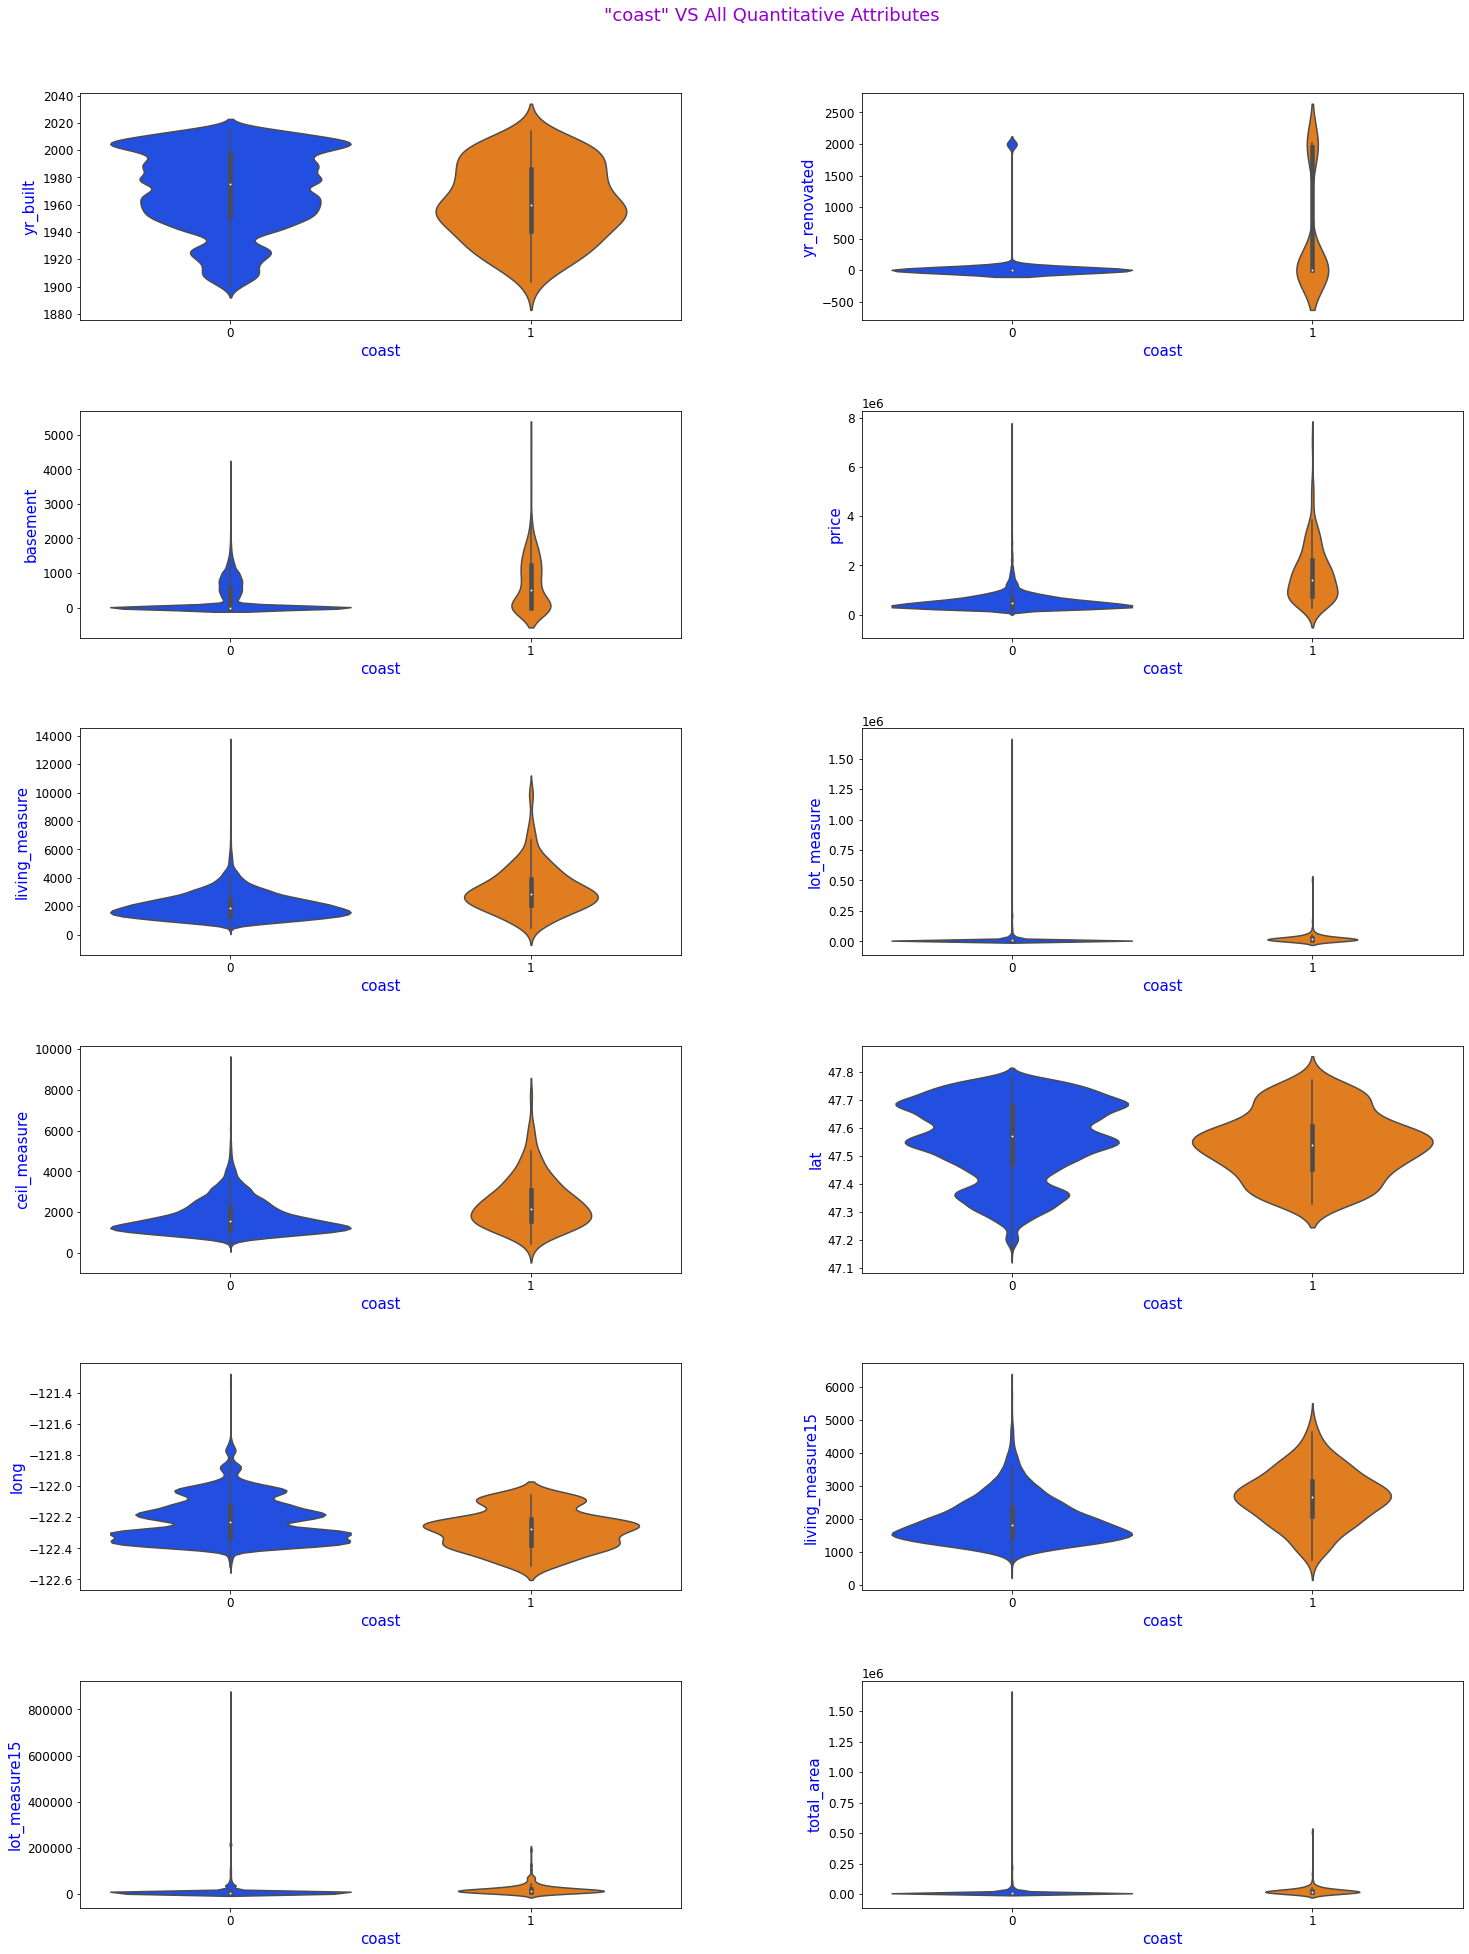

In [36]:
# Bivariate Analysis for 'coast' VS all Quantitative attributes
bi_Anly('coast')

***
**Key Observations:-**
* Non coast has less prices than that of coast and spread more in between price value 0 to 2 for non coast area.
***

### Bivariate Analysis 6: 'sight' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "sight" VS All Quantitative Attributes:-



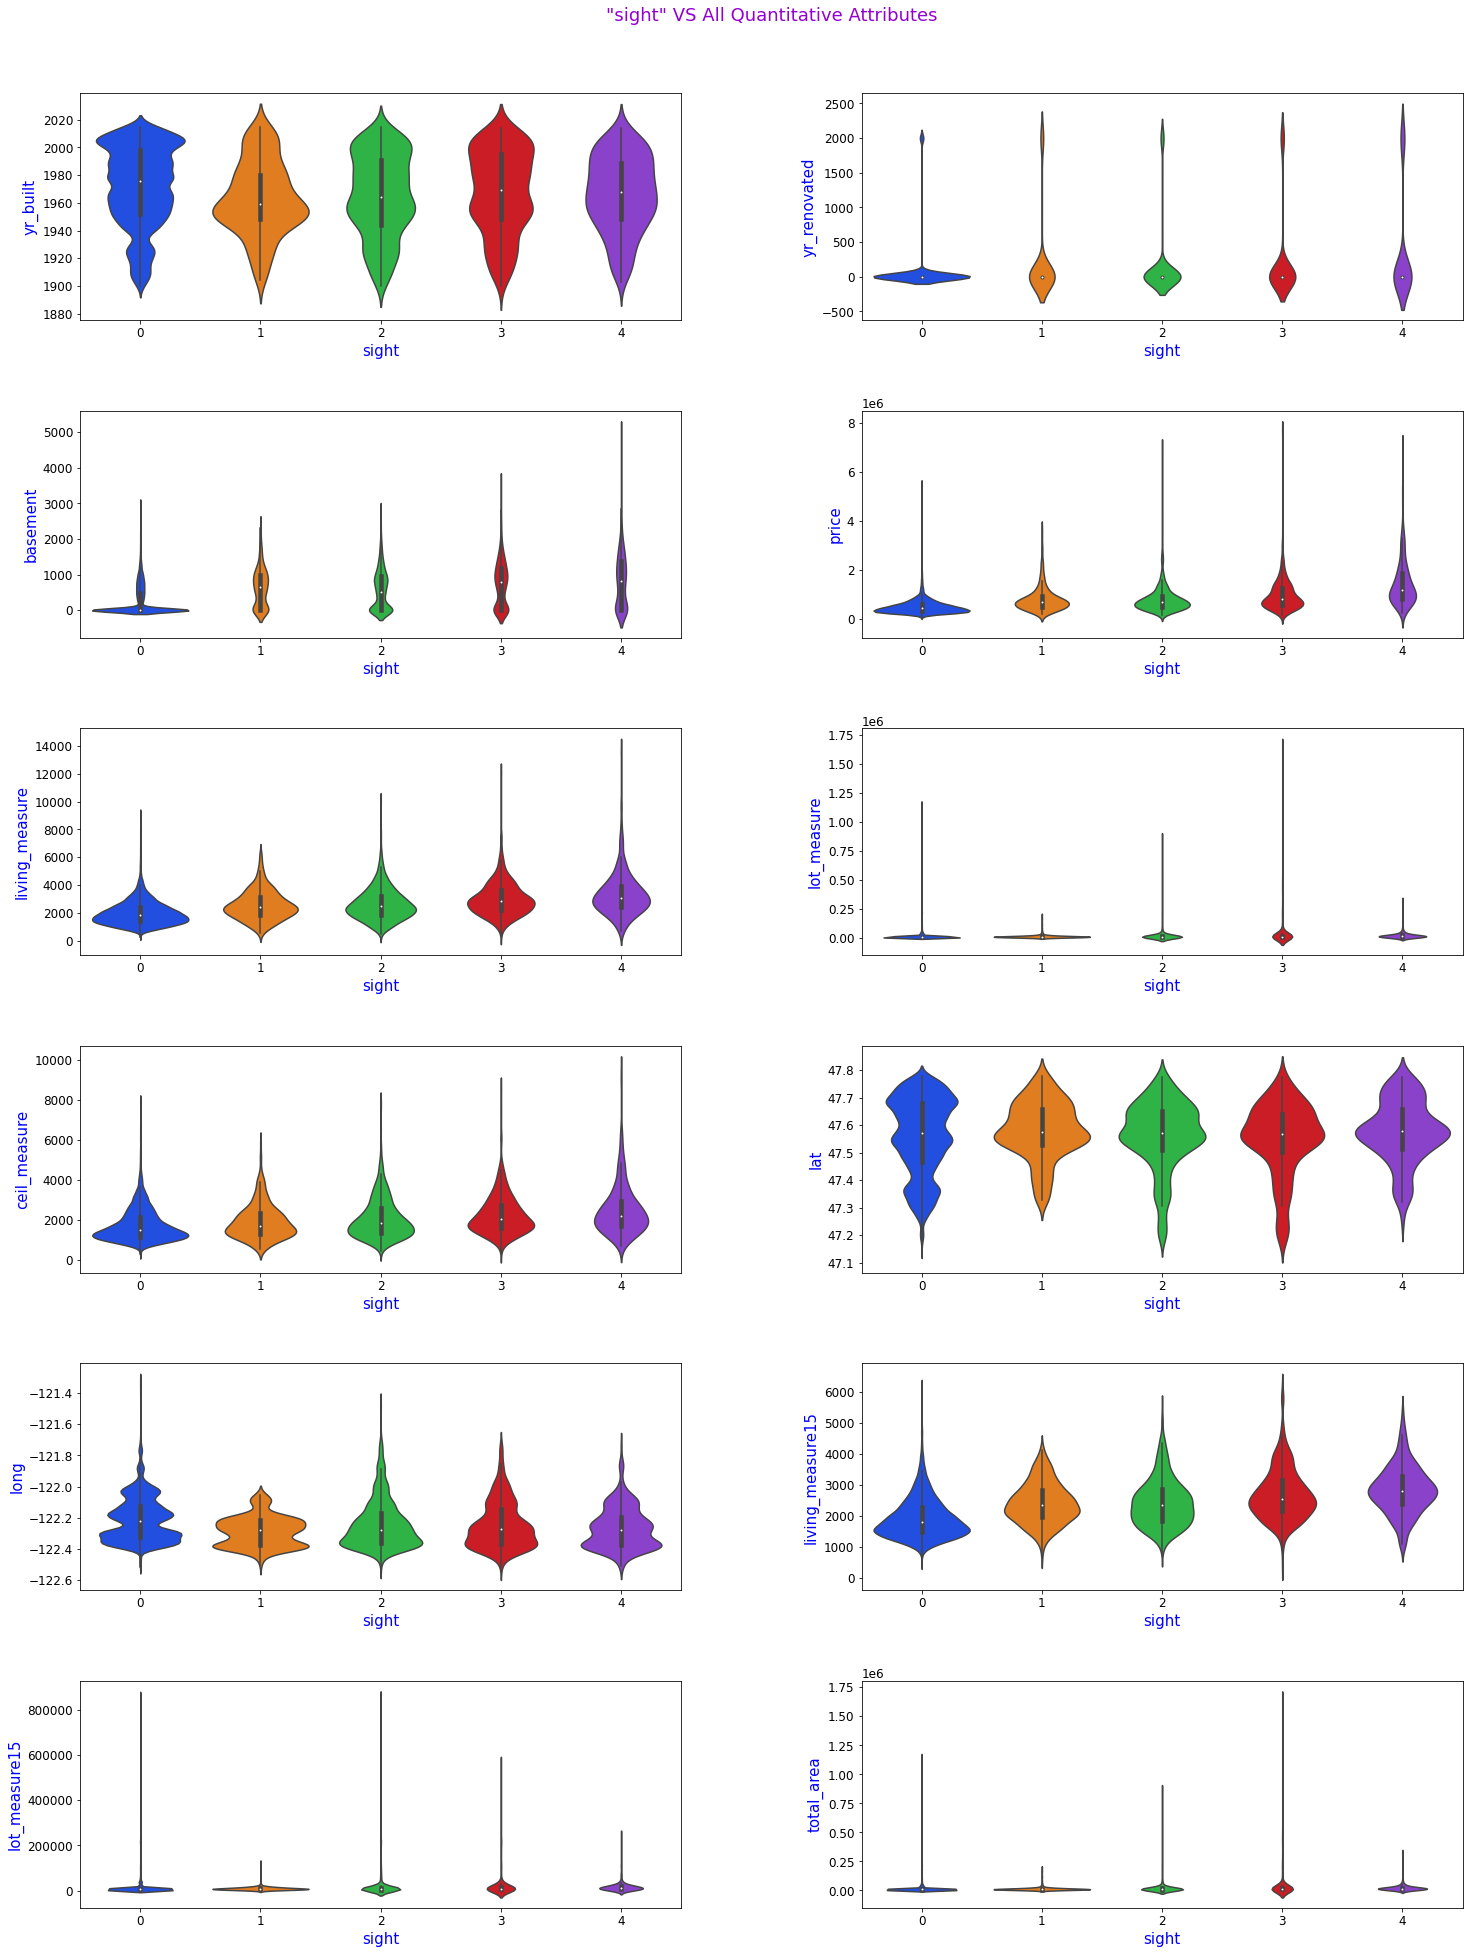

In [37]:
# Bivariate Analysis for 'sight' VS all Quantitative attributes
bi_Anly('sight')

***
**Key Observations:-**
* sight with value 3 has max range of lot_measure.
***

### Bivariate Analysis 7: 'furnished' VS all Quantitative attributes


Plots Showing Bivariate Analysis of "furnished" VS All Quantitative Attributes:-



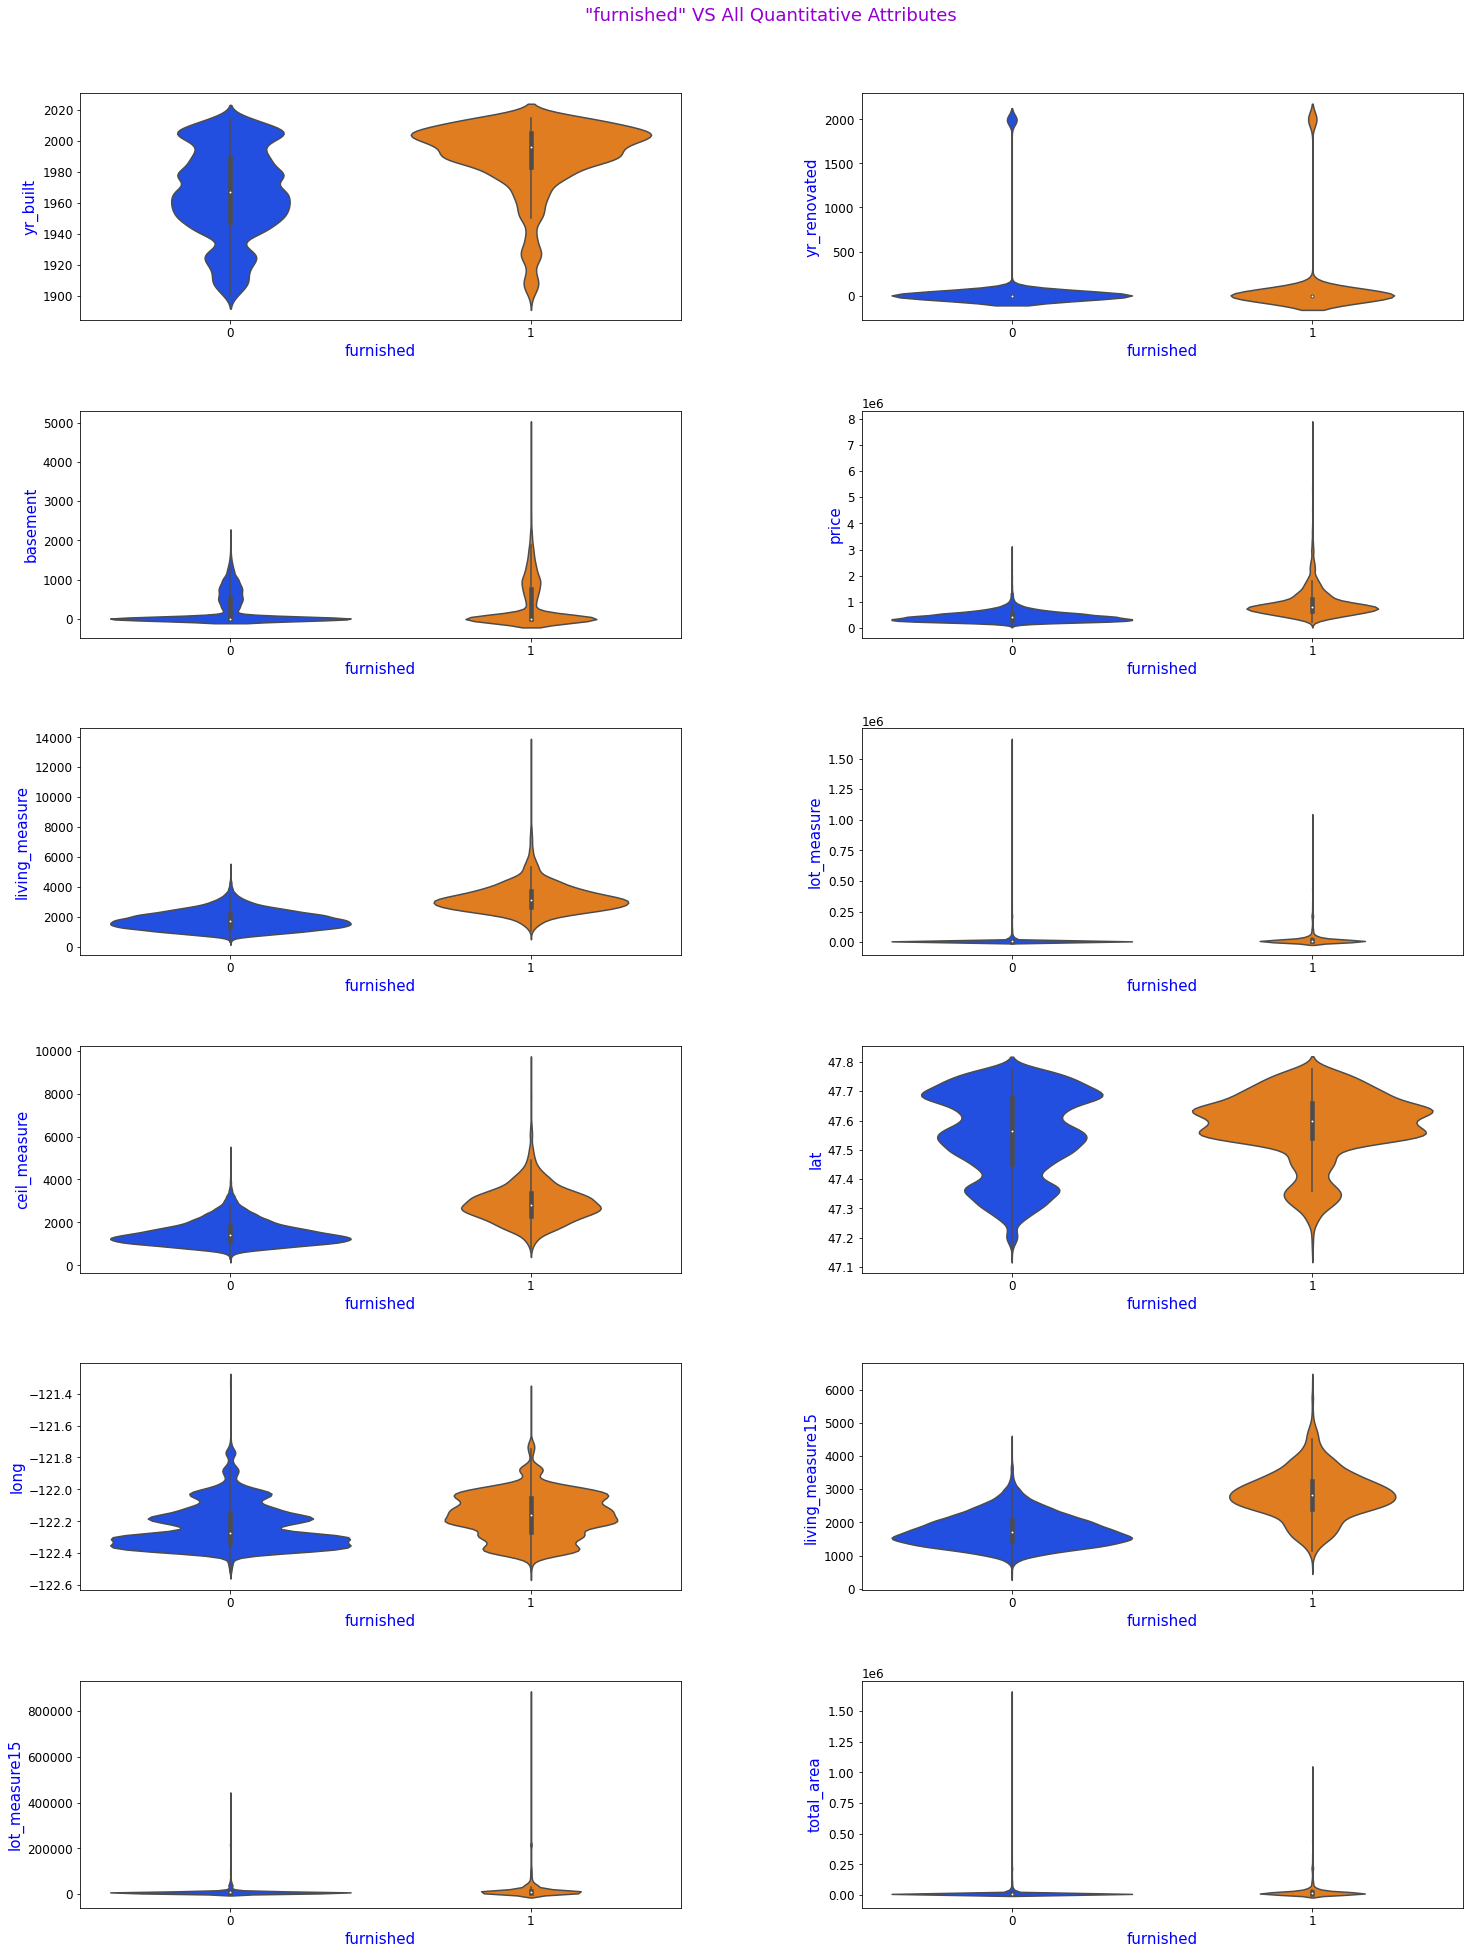

In [38]:
# Bivariate Analysis for 'furnished' VS all Quantitative attributes
bi_Anly('furnished')

***
**Key Observations:-**
* As compare to furnished the price is much higher than that of non-furnished houses.
* Non furnished has max range of total_area comparatively than furnished.
***

## <span style="color:#9400D3">- Multivariate Analysis
    
* Multivariate analysis is performed to understand interactions between different fields in the dataset.
* Here we are checking all the variations of the data with respect to our target attribute only.


Plots Showing Multivariate Analysis with respect to target attribute only:-


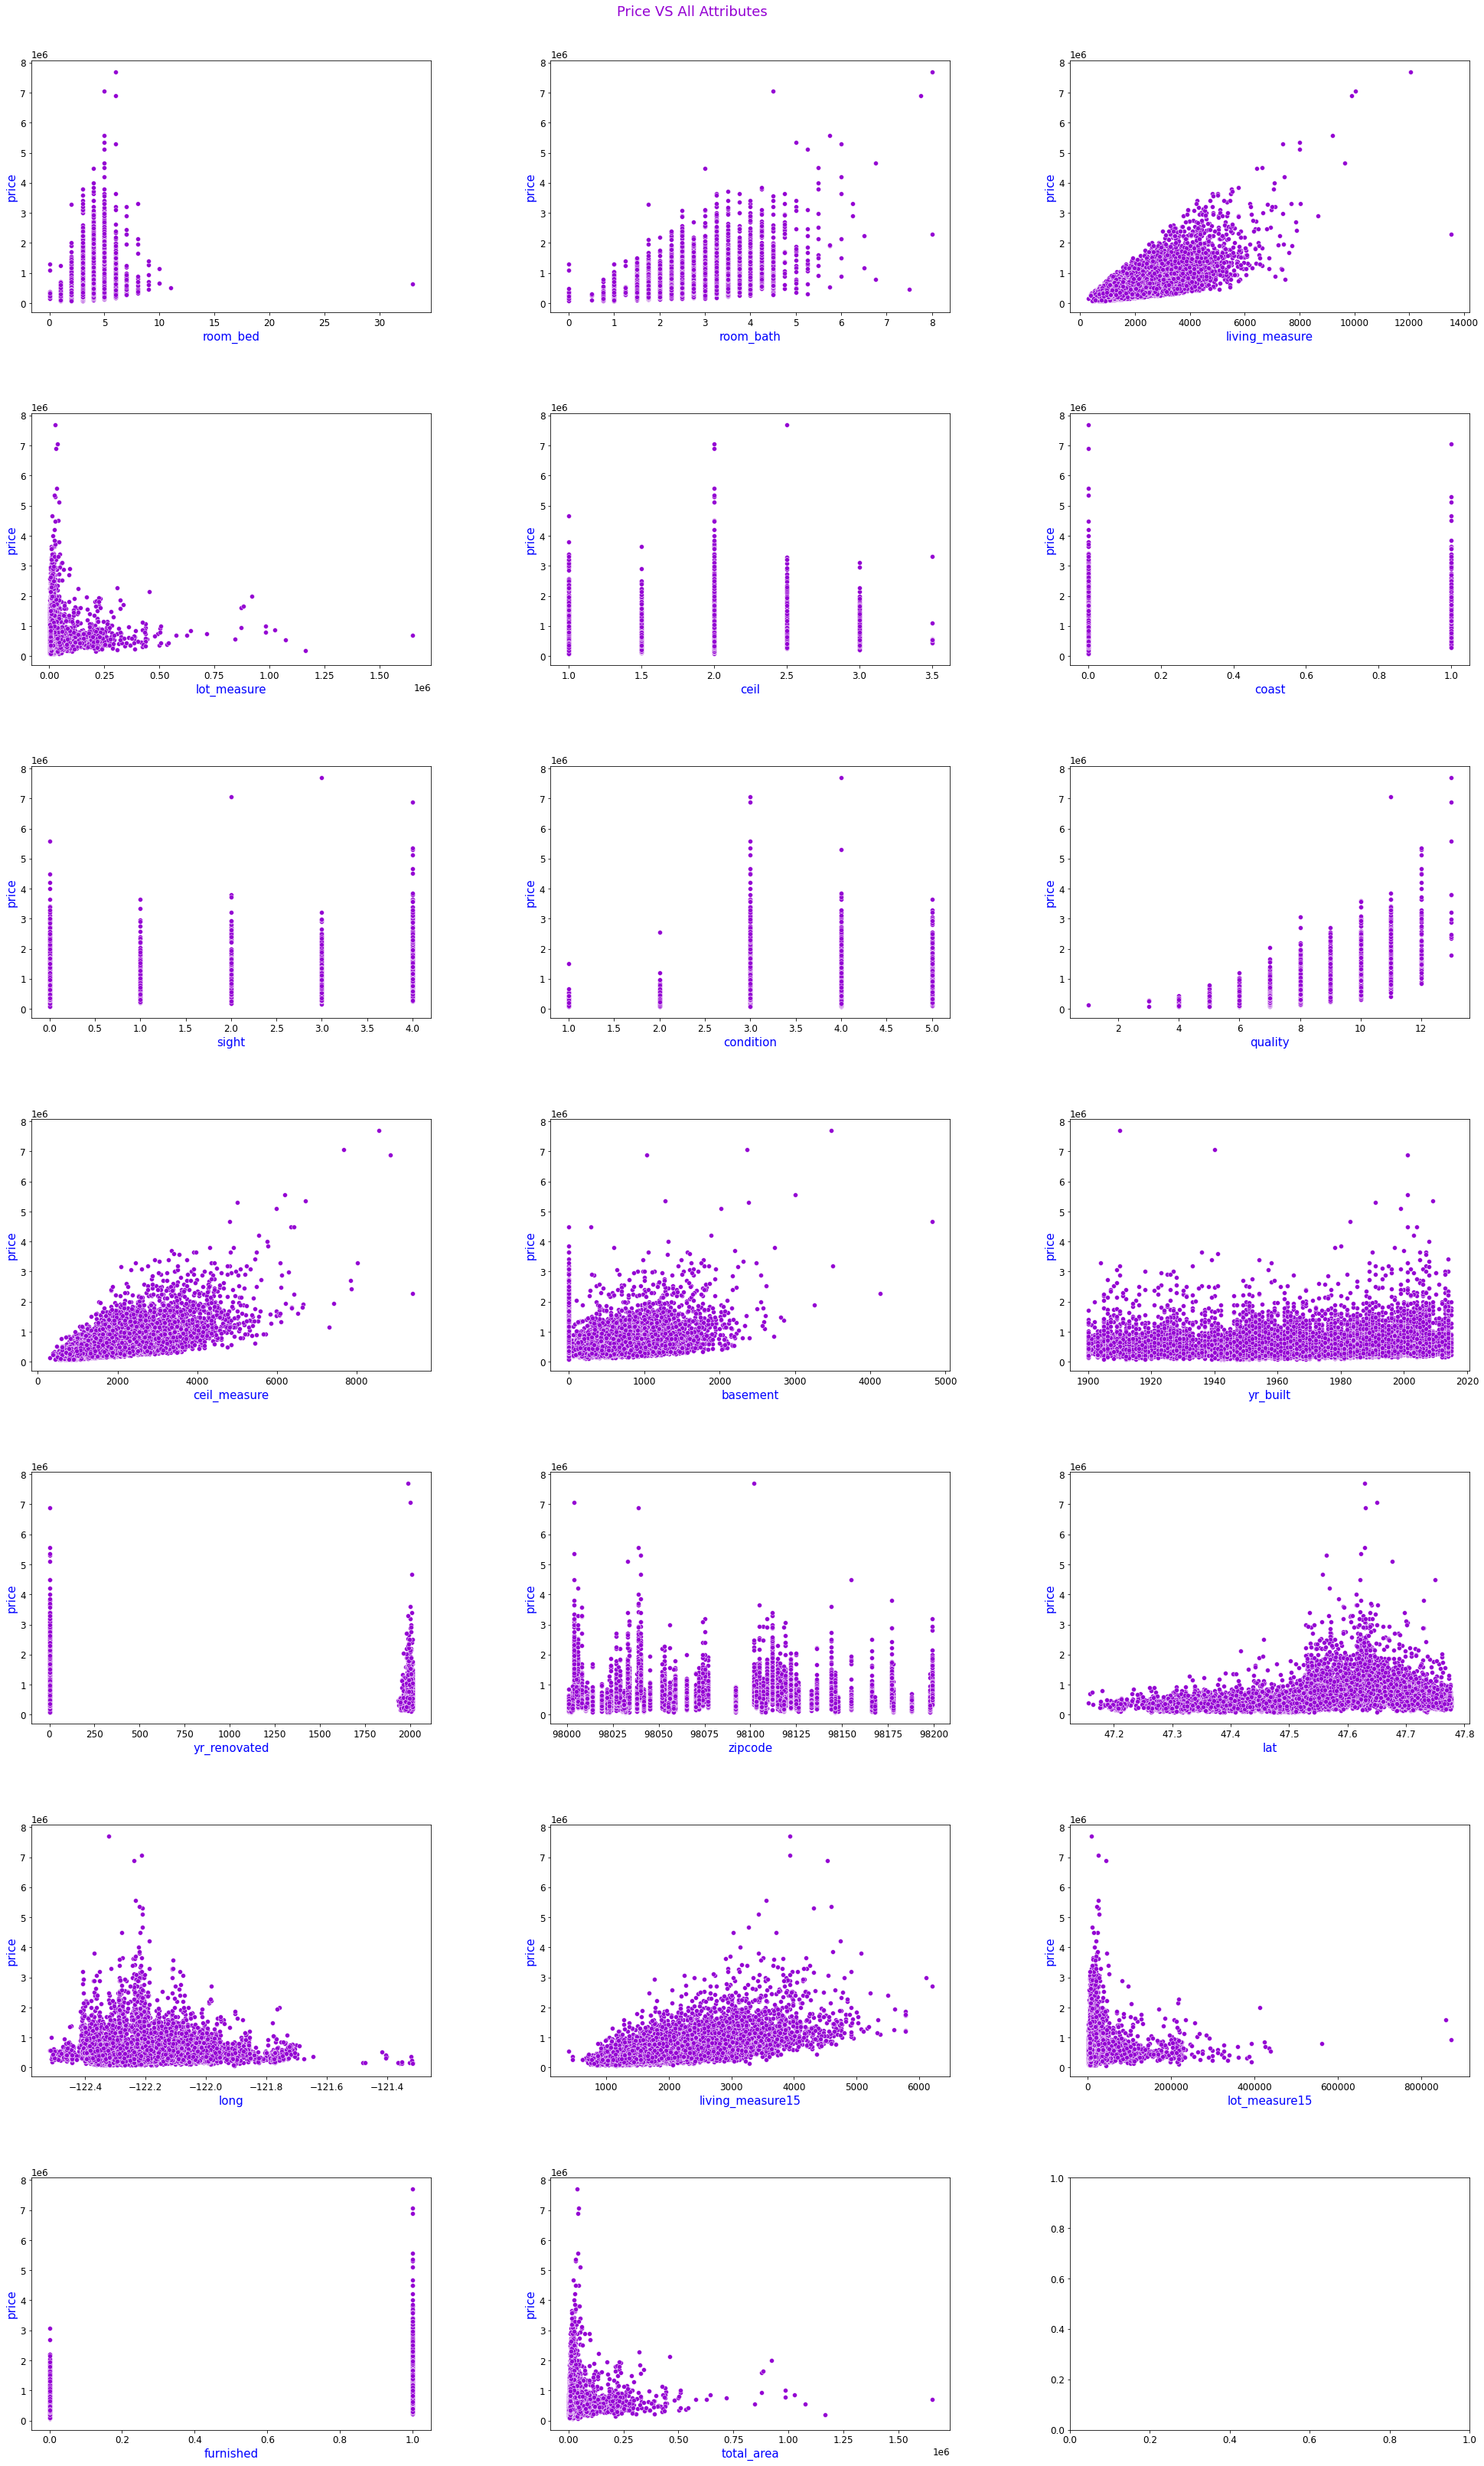

In [39]:
# Plotting for the Multivariate Analysis by considering the target attribute only
print(f'\033[1m\nPlots Showing Multivariate Analysis with respect to target attribute only:-')

# Setting up Sub-Plots
fig, axes = plt.subplots(7, 3, figsize=(30, 50))
fig.suptitle('Price VS All Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.97, top=0.96, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.scatterplot(ax=axes[0, 0], x='room_bed', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[0, 1], x='room_bath', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[0, 2], x='living_measure', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[1, 0], x='lot_measure', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[1, 1], x='ceil', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[1, 2], x='coast', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[2, 0], x='sight', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[2, 1], x='condition', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[2, 2], x='quality', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[3, 0], x='ceil_measure', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[3, 1], x='basement', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[3, 2], x='yr_built', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[4, 0], x='yr_renovated', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[4, 1], x='zipcode', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[4, 2], x='lat', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[5, 0], x='long', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[5, 1], x='living_measure15', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[5, 2], x='lot_measure15', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[6, 0], x='furnished', y='price', data=House_Data, color="#9400D3");
sns.scatterplot(ax=axes[6, 1], x='total_area', y='price', data=House_Data, color="#9400D3");
plt.show()

***
**Key Observations:-**
* We can observe that ceil_measure and living_measure are showing some linear relation with the price.
* We observed some vertically aligned data points in some plots. These are showing the categorical/discrete behaviour.
* Rest of the plots are showing less correlation with the price.
***

## <span style="color:#9400D3">Finding the Hidden Patterns

### <span style="color:#9400D3">- Dividing the houses based on Price Range(PR)
    
Here we divide the Prices of the House into 3 Price Ranges,
* Low Range = (0 - 500000)
* Mid Range = (500000 - 1500000)
* High Range = (1500000 and above)

In [40]:
# Getting the number of houses based on three categories(low,mid and high)
low_PR = len(House_Data[House_Data['price']<500000])

mid_PR = len(House_Data[(House_Data['price']>=500000) & (House_Data['price']<1500000)])

high_PR = len(House_Data[House_Data['price']>=1500000])

# Displaying the results
print('\n\033[1mOn dividing the houses based on Price Range we get:-')
display(pd.DataFrame({'Low':low_PR,'Mid':mid_PR,'High':high_PR},index=['Number of Houses']))


On dividing the houses based on Price Range we get:-


Low   Mid  High
Number of Houses  12408  8670   535

***
**Key Observations:-**
* We can observe that majority of buyers are in low price range.
* Only few buyers are in high price range.
***

### <span style="color:#9400D3">- Finding Top 10 Popular areas where the Buyers shown their interest to Buy Properties

In [41]:
# Getting top 10 Popular Areas
print('\n\033[1mTable showing Top 10 Popular Areas:-')
ZIPcode = House_Data['zipcode'].value_counts().to_frame('Number of Houses')[:10].reset_index()
ZIPcode['ZIPcode'] = ZIPcode['index']
ZIPcode = ZIPcode.drop('index',axis=1).set_index('ZIPcode')

# Displaying the result
display(ZIPcode)


Table showing Top 10 Popular Areas:-


Number of Houses
ZIPcode                  
98103                 602
98038                 590
98115                 583
98052                 574
98117                 553
98042                 548
98034                 545
98118                 508
98023                 499
98006                 498

***
**Key Observations:-**
* We have the list of top 10 popular areas where the buyers shown their interest to buy properties.
* Area with ZIPcode 98103 is the most popular area.
***

### <span style="color:#9400D3">- Finding the Bedroom Trends

In [42]:
# Getting the Bedroom Trends
print('\n\033[1mTable showing the Bedroom Trends:-')
Bed_Tre = House_Data['room_bed'].value_counts().to_frame('Number of Houses').reset_index()
Bed_Tre['Number of Bedrooms'] = Bed_Tre['index']
Bed_Tre = Bed_Tre.drop('index',axis=1).set_index('Number of Bedrooms')

# Displaying the result
display(Bed_Tre)


Table showing the Bedroom Trends:-


Number of Houses
Number of Bedrooms                  
3                               9824
4                               6882
2                               2760
5                               1601
6                                272
1                                199
7                                 38
8                                 13
0                                 13
9                                  6
10                                 3
11                                 1
33                                 1

***
**Key Observations:-**
* From above table we can say, more number of buyers are interested in buying houses having 3 bedrooms.
***

### <span style="color:#9400D3">- Finding Premium Houses having following requirement:-
* Should be Furnished.
* Should have Large area.
* Should be in Good condition.

In [43]:
# Getting the Premium Houses based on above given condition
Prem_Hous = House_Data[(House_Data['furnished']==1) & (House_Data['condition']>=3) & (House_Data['total_area']>=10000)]
Prem_Hous = Prem_Hous.sort_values(by=['price'], ascending = False)
# Displaying total number of Premium Houses
print('\n\033[1mTotal Number of Premium Houses =',len(Prem_Hous))
print('\n\033[1mPremium Houses:-')
display(Prem_Hous[['furnished','total_area','condition','room_bed','zipcode','price']].head())


Total Number of Premium Houses = 3013

Premium Houses:-


furnished  total_area  condition  room_bed  zipcode    price
16785          1       39650          4         6    98102  7700000
19888          1       47365          3         5    98004  7060000
264            1       41264          3         6    98039  6890000
20917          1       44269          3         5    98039  5570000
17618          1       31985          3         5    98004  5350000

***
**Key Observations:-**
* We got the Premium Houses based on given conditions.
* There are 3012 Premium Houses that are sold.
***

### <span style="color:#9400D3">- Cheapest Houses sold in Coastal areas

In [44]:
# Getting Cheapest Houses sold in Coastal areas
Costl_Hous = House_Data[(House_Data['coast']==1) & (House_Data['price']<=500000)]

# Displaying total number of Cheapest Houses in Coastal areas
print('\n\033[1mTotal Number of Cheapest Houses in Coastal areas =',len(Costl_Hous))
print('\n\033[1mCheapest Coastal Houses:-')
display(Costl_Hous[['cid','coast','price']])


Total Number of Cheapest Houses in Coastal areas = 14

Cheapest Coastal Houses:-


cid  coast   price
2040    221029019      1  400000
4383   8550001515      1  429592
5993   2013802060      1  500000
7258   2423029009      1  465000
8862   2923039243      1  340000
11194  2123039032      1  369900
12120  3523029041      1  290000
12669   222029026      1  340000
13157  2013802030      1  357000
14514  7631800110      1  380000
14897   121039042      1  425000
15273  5216200090      1  385000
18189  1922039062      1  480000
19672  2781600195      1  285000

***
**Key Observations:-**
* We got Cheapest Houses sold in Coastal areas.
* There are 14 cheapest houses in coastal areas.
***

### <span style="color:#9400D3">- Checking the Price Comaprison between Renovated and Non-renovated houses

In [45]:
Non_Reno = House_Data[(House_Data['yr_renovated']==0)]['price'].value_counts()
Reno = House_Data[(House_Data['yr_renovated']!=0)]['price'].value_counts()

# Displaying  Price pattern of Renovated and Non-renovated houses
print('\n\033[1mTotal number of Renovated Houses =',len(House_Data[(House_Data['yr_renovated']!=0)]))
print('\n\033[1mTotal number of Non-Renovated Houses =',len(House_Data[(House_Data['yr_renovated']==0)]))
NrnRn = {'Renovated Price':sorted(Reno.index[:10],reverse=True),'Non Renovated Price':sorted(Non_Reno.index[:10],reverse=True)}
print('\n\033[1mTable showing top 10 Price Comaprison between Renovated and Non-renovated houses:-')
display(pd.DataFrame(NrnRn))


Total number of Renovated Houses = 914

Total number of Non-Renovated Houses = 20699

Table showing top 10 Price Comaprison between Renovated and Non-renovated houses:-


Renovated Price  Non Renovated Price
0          1100000               550000
1           900000               500000
2           850000               450000
3           800000               425000
4           750000               400000
5           700000               375000
6           550000               350000
7           500000               325000
8           450000               300000
9           400000               250000

***
**Key Observations:-**
* From above data we can see that there are only few houses that are renovated.
* By observing above pattern we can say that the cost of renovated houses is higher than non-renovated houses.
***

### <span style="color:#9400D3">- Finding the Month in which buyers bought more number of houses.

In [46]:
# Getting the Month in which buyers bought more number of houses
Month_hous = House_Data['dayhours'].dt.month.value_counts().to_frame('Number of Houses').reset_index()
Month_hous['Month'] = Month_hous['index']
Month_hous = Month_hous.drop('index',axis=1).set_index('Month')

# Displaying the result
print('\n\033[1mThe Month in which buyers bought more number of houses is =',int(Month_hous.index[:1].values))
print('\n\033[1mTable showing the Months in which buyers bought houses.:-')
display(Month_hous)


The Month in which buyers bought more number of houses is = 5

Table showing the Months in which buyers bought houses.:-


Number of Houses
Month                  
5                  2414
4                  2231
7                  2211
6                  2180
8                  1940
10                 1878
3                  1875
9                  1774
12                 1471
11                 1411
2                  1250
1                   978

***
**Key Observations:-**
* Hence on month 5 that is 'May', highest number of houses were sold.
* We can consider period of month 4 to 7 (April to July) as highest selling period for housing.
***

### <span style="color:#9400D3">- Finding relation between Year_built and Price.

Plot Showing relation between Year_built and Price :-


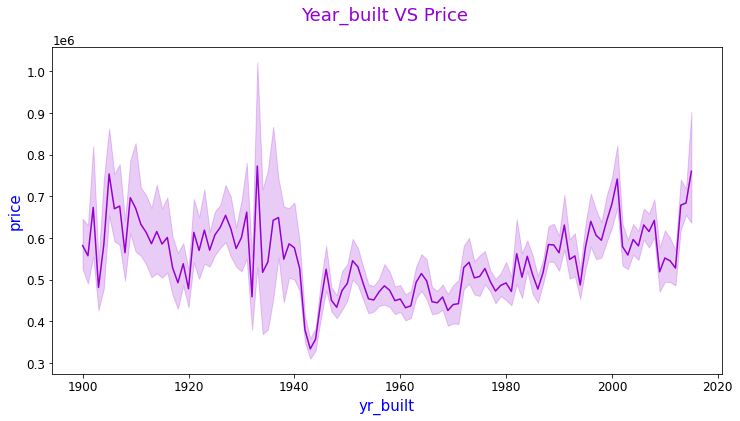

In [47]:
# Displaying relation between Year_built and Price
print(f'\033[1mPlot Showing relation between Year_built and Price :-')
plt.figure(figsize=(12,6))
plt.title('Year_built VS Price \n')
sns.lineplot(x='yr_built', y='price', data=House_Data, color="#9400D3");
plt.show()

***
**Key Observations:-**
* We can observe that there is no significant linear trend between Year built and Price.
* Around 1940 to 1945, there is a sudden fall in price of the houses.
***

# <span style="color:#9400D3">Data Pre-Processing

## <span style="color:#9400D3">- Dropping the Attributes
    
* Since attributes 'cid' is not giving much information for our modeling and is not helpful for our further process, we can drop this attribute.
* 'dayhours' attribute is based on the houses that are sold within 1 year range, hence it wont give much informatino we can drop it.

In [9]:
# Dropping customerID Attribute
House_Data.drop(['cid','dayhours'],axis=1,inplace=True)

# Getting Shape and Size of data
H_shape = House_Data.shape

# Checking the Dataset
print('\033[1mDataset consist:-\033[0m\n Rows    =',H_shape[0],'\n Columns =',H_shape[1],'\n\n\033[1mDataset:-\033[0m')
display(House_Data.head())

Dataset consist:-
 Rows    = 21613 
 Columns = 21 

Dataset:-


price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0      0          5        9          3020         0      1956             0   
1      0          3        8          1750       800      1976             0   
2      0          3        8          2370         0      2006             0   
3      0          4        6           820         0      1916             0   
4      0          4        8          1400         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450

***
**Key Observations:-**
* We have dropped the attributes based on our functional knowledge.
***

## <span style="color:#9400D3">- Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have outliers or extreme values, we will do FLOORING AND CAPPING.
* Since outliers in Categorical features doesn't give any meaning, we are neglecting them.
* Hence this analysis is only for Continuous Features.

###  FLOORING AND CAPPING
In this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.


Outlier Analysis Report:-


Attribute  Outliers Before F&C  Outliers After F&C
0             price                 1159                   0
1    living_measure                  572                   0
2       lot_measure                 2425                   0
3      ceil_measure                  611                   0
4               lat                    2                   0
5              long                  256                   0
6  living_measure15                  544                   0
7     lot_measure15                 2194                   0
8        total_area                 2419                   0

Total Outliers Observed in the all the attributes together = 10182


Checking the distribution for Price Attribute:
Plot Showing Distribution of Feature "price":-



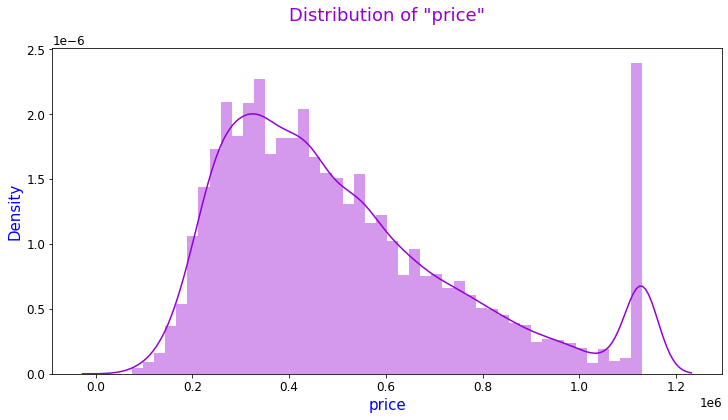


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "price":-



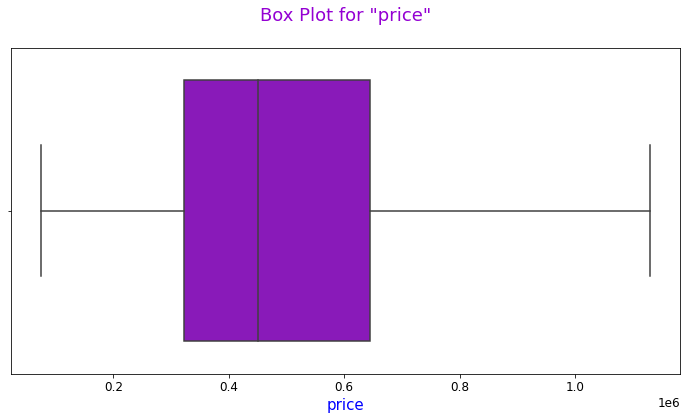

In [10]:
# Creating list of Continuous Features
continuous_features = ['price','living_measure','lot_measure','ceil_measure','lat','long','living_measure15','lot_measure15',
                     'total_area']

# Creating empty lists
Attributes = []   # to store attribute names
OL_before = []    # to store outliers before flooring and capping
OL_after = []     # to store outliers after flooring and capping

# Sending all the Continuous columns inside the loop
for i in continuous_features:
    Attributes.append(i)
    
    # Getting Interquartile Range
    q1 = House_Data[i].quantile(0.25)
    q3 = House_Data[i].quantile(0.75)
    IQR = q3 - q1
    
    # Getting Outliers Before Flooring and Capping Imputation
    cnt1 = 0   # counter to count the outliers
    for k in House_Data[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            cnt1 += 1
    OL_before.append(cnt1)
    
    # Getting Lower fence and Upper fence
    LF = q1 - (1.5*IQR)
    UF = q3 + (1.5*IQR)
    
    # Replacing all the outliers by upper and lower fence values
    House_Data[i] = np.where(House_Data[i]>UF,UF,np.where(House_Data[i]<LF,LF,House_Data[i]))
    
    # Getting Outliers After Flooring and Capping Imputation
    cnt2 = 0    # counter to count the outliers
    for k in House_Data[i]:
        if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
            cnt2 += 1
    OL_after.append(cnt2)
    
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':Attributes,
                                 'Outliers Before F&C':OL_before,
                                 'Outliers After F&C':OL_after})

# Displaying Outlier Analysis report
print('\n\033[1mOutlier Analysis Report:-')
display(Outlier_Analysis) 
print('\033[1mTotal Outliers Observed in the all the attributes together =',sum(OL_before))

# Checking the distribution for Price Attribute
print('\n\nChecking the distribution for Price Attribute:')
qnt_data('price')

***
**Key Observations:-**
* As we observe lots of outliers in our quantitative attributes, we decided to use Flooring and Capping technique to handle outliers.
* We found 10182 outliers in total.
* After the outlier analysis, there are no outliers left.
***

## <span style="color:#9400D3">- Data Standardization

Since our Continuous attributes are Normally Distributed, we will do **Z-Score Standardization**.

By Standardizing the values, we will get the following statistics of the data distribution whose,
* Mean = 0
* Standard Deviation = 1

In [11]:
# Creating list of Continuous Features
continuous_features = ['price','living_measure','lot_measure','ceil_measure','lat','long','living_measure15','lot_measure15',
                     'total_area']

# Storing price value(without scaling) for future use
Input_Data = House_Data.drop(columns='price')
Price = House_Data['price'].copy()

# Applying Z-Scores to the continuous data attributes
House_Data[continuous_features] = House_Data[continuous_features].apply(zscore)

# Checking the Mean and Standard Deviation
print('\033[1mTable Showing Mean and Standard Deviation of Scaled Continuous Data:-')
display(House_Data[continuous_features].describe()[1:3].T)

Table Showing Mean and Standard Deviation of Scaled Continuous Data:-


mean       std
price             4.667324e-17  1.000023
living_measure    1.743235e-16  1.000023
lot_measure       1.064197e-16  1.000023
ceil_measure      9.062395e-17  1.000023
lat              -2.431033e-14  1.000023
long              3.689728e-14  1.000023
living_measure15  5.395726e-17  1.000023
lot_measure15     1.340918e-16  1.000023
total_area       -6.541239e-17  1.000023

***
**Key Observations:-**
* The Mean values are approaching Zero.
* Standard Deviation is approaching One.
* Hence we have scaled the continuous attributes to corresponding Z-Scores.
***

## <span style="color:#9400D3">- Segregation of Predictors and Target Attributes.
    
We will seperate all other attributes from our target attribute 'price' for further process.

In [12]:
# Getting Predictors by dropping Class Attribute
X = House_Data.drop(columns='price')

# Getting Target Attribute
y = House_Data['price'] 

print('\033[1mTable Showing Segregated Predictors:-')
display(X.head())

Table Showing Segregated Predictors:-


room_bed  room_bath  living_measure  lot_measure  ceil  coast  sight  \
0         4       3.25        1.146116     0.941623   1.0      0      0   
1         4       2.50        0.586117    -0.238830   1.0      0      0   
2         3       2.50        0.371650    -0.868194   2.0      0      0   
3         2       1.00       -1.475153    -0.963312   1.0      0      0   
4         2       1.50       -0.784091    -0.922491   1.0      0      0   

   condition  quality  ceil_measure  basement  yr_built  yr_renovated  \
0          5        9      1.636673         0      1956             0   
1          3        8     -0.025606       800      1976             0   
2          3        8      0.785900         0      2006             0   
3          4        6     -1.242865         0      1916             0   
4          4        8     -0.483714         0      1954             0   

   zipcode       lat      long  living_measure15  lot_measure15  furnished  \
0    98133  1.135591 -0.882558          0.223252      -0.170774          1   
1    98023 -1.757746 -1.246974          0.438974       0.115013          0   
2    98038 -1.505147  1.573604          0.608470      -0.905297          0   
3    98133  1.045377 -0.977306         -0.701270      -1.020804          0   
4    98115  0.842577 -0.394241         -0.115739      -0.540442          0   

   total_area  
0    1.050860  
1   -0.135220  
2   -0.754558  
3   -1.129188  
4   -0.984134

***
**Key Observations:-**
* We have Segregated Predictors and Target Attributes and assigned them to X and y respectively
***

## <span style="color:#9400D3">- Splitting the Data into Training set and Test Set
 * The procedure involves taking a dataset and dividing it into two subsets.
 * The first subset is used to fit the model and is referred to as the training dataset. 
 * The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.
 * Here we keep 75:25 ratio i.e. 75% of data as Training set and 25% as Testing set.
    
NOTE:- After checking the splitting ratios 70:30, 75:25 and 80:20 we decided to keep 75:25 ratio, since this ratio is giving better accuracy when compared to all other ratios.

In [13]:
# Splitting into Train and Test Sets with the ratio 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Data':['X_train','y_train','X_test','y_test'],
                    'Rows':[len(X_train),len(y_train),len(X_test),len(y_test)],
                    'Columns':[len(X_train.columns),1,len(X_test.columns),1]}).set_index('Data')
print('\033[1mTable Showing splitted data into Train and Test sets:-')
display(TTS)

Table Showing splitted data into Train and Test sets:-


Rows  Columns
Data                   
X_train  16209       20
y_train  16209        1
X_test    5404       20
y_test    5404        1

***
**Key Observations:-**
* We have splitted data in 75:25 Ratio.
* Training data has 16209 and Testing data has 5404 observations.
***

# <span style="color:#9400D3">Modeling
   
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

## <span style="color:#9400D3">- Model Training and Getting Accuracies

* In this process we are applying various models that fits our data.
* On training all the models with training dataset, we will capture the accuracy scores for train and test data sets.
* Based on the test accuracy and checking the overfitting and underfitting of the model, we are selecting our final model.

In [53]:
# Creating list of Models for our data
Models = [LinearRegression(), LassoCV(), Ridge(), ARDRegression(), BayesianRidge(), ElasticNet(), ElasticNetCV(),  RidgeCV(),
          HuberRegressor(), Lars(), LarsCV(), LassoLarsCV(), LassoLarsIC(), OrthogonalMatchingPursuit(), XGBRegressor(),
          OrthogonalMatchingPursuitCV(), RANSACRegressor(), TweedieRegressor(),GradientBoostingRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), ExtraTreesRegressor(),DecisionTreeRegressor(), 
          ExtraTreeRegressor(), CCA(), PLSRegression(), KNeighborsRegressor(), KernelRidge(), TransformedTargetRegressor()]
 
# Creating empty sets to store train and test accracies
Train_Accuracy = []
Test_Accuracy = []
Diff_Accuracy = []

# Training models and getting accuracies for Train and Test Data
for model in Models:
    model.fit(X_train,y_train)
    train = round(model.score(X_train,y_train),4)*100
    test = round(model.score(X_test,y_test),4)*100
    Train_Accuracy.append(train)
    Test_Accuracy.append(test)
    Diff_Accuracy.append(train-test)

# Getting differences between train and test accuracies

# Getting model names only for better representation
model_names = [x[:x.index('(')] for x in pd.Series(Models).apply(str)]     
    
# Displaying the Model Accuracy Report
print('\033[1mAccuracy Report of all the Models:-')
Model_Report1 = pd.DataFrame({'Models':model_names, 'Train Accuracy (%)':Train_Accuracy, 'Test Accuracy (%)':Test_Accuracy,
                              '(Train Accuracy - Test Accuracy)':Diff_Accuracy})
Model_Report1 = Model_Report1.sort_values(['Test Accuracy (%)'],ascending=False).reset_index().drop('index',axis=1)
display(Model_Report1)

Accuracy Report of all the Models:-


Models  Train Accuracy (%)  Test Accuracy (%)  \
0           ExtraTreesRegressor               99.85              89.63   
1         RandomForestRegressor               98.39              89.49   
2                  XGBRegressor               96.25              89.47   
3              BaggingRegressor               97.73              88.40   
4     GradientBoostingRegressor               88.76              87.65   
5         DecisionTreeRegressor               99.85              78.10   
6            ExtraTreeRegressor               99.85              76.23   
7              LinearRegression               76.29              75.83   
8                   LassoLarsCV               76.29              75.83   
9                   LassoLarsIC               76.29              75.83   
10   TransformedTargetRegressor               76.29              75.83   
11                       LarsCV               76.29              75.83   
12                         Lars               76.29              75.83   
13                        Ridge               76.29              75.83   
14                      RidgeCV               76.29              75.83   
15                BayesianRidge               76.29              75.82   
16                  KernelRidge               75.91              75.44   
17                          CCA               75.75              75.21   
18                ARDRegression               73.38              73.31   
19  OrthogonalMatchingPursuitCV               73.60              73.21   
20                PLSRegression               72.46              71.56   
21               HuberRegressor               71.90              71.16   
22                      LassoCV               68.37              67.97   
23             TweedieRegressor               68.75              67.89   
24            AdaBoostRegressor               67.89              66.83   
25                 ElasticNetCV               67.21              66.71   
26              RANSACRegressor               65.15              66.21   
27    OrthogonalMatchingPursuit               60.23              60.70   
28          KNeighborsRegressor               71.77              56.23   
29                   ElasticNet               29.51              29.15   

    (Train Accuracy - Test Accuracy)  
0                              10.22  
1                               8.90  
2                               6.78  
3                               9.33  
4                               1.11  
5                              21.75  
6                              23.62  
7                               0.46  
8                               0.46  
9                               0.46  
10                              0.46  
11                              0.46  
12                              0.46  
13                              0.46  
14                              0.46  
15                              0.47  
16                              0.47  
17                              0.54  
18                              0.07  
19                              0.39  
20                              0.90  
21                              0.74  
22                              0.40  
23                              0.86  
24                              1.06  
25                              0.50  
26                             -1.06  
27                             -0.47  
28                             15.54  
29                              0.36

***
**Key Observations:-**
* We trained various models for our data and captured the train and test accuracies successfully.
* By observing above table we can consider **GradientBoostingRegressor** as our final model since it has good test accuracy with minimum difference of train and test accuracies.
* We can observe that ElasticNet regressor is showing least accuracies for our data.
***

## <span style="color:#9400D3">- Model Selection
     
* By observing above results we can consider **GradientBoostingRegressor** as our final model since it has good test accuracy with minimum difference of train and test accuracies.
* The models which are showing higher accuracies than GradientBoostingRegressor are also showing high overfitting. Hence we didn't cosider them as the final model.

## <span style="color:#9400D3">- Feature Selection
    
* Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.
* We are using Filter method of Feature Selection for our data.
* In this method the features are selected by filtering them based on feature importance scores.
* Here we are diving the process into 3 steps.
    1. Checking feature importance using different techniques and getting the feature importance scores to select top features.(Out of all feature importance scores we will consider only the top scores that are affecting our target attribute. Then we will set a threshold value for choosing the top scores and based on this top score, we will select the features.)
    2. Checking the accuracies of the model based on different threshold values for the top importance scores.
    3. Setting the threshold value which will give best accuracy to our model and Selecting the features based on the threshold score.(All the features that appear on top of the threshold score in any of the techniques are selected)
    
NOTE:- Here we are choosing top 6 regressors based on model accuracy.
    
### <span style="color:#9400D3"> 1. Checking Feature Importance
 
* Feature importance scores helps us to know the insight of the data. 
* For selecting the features first we will observe the feature importance scores with respect to our target attribute.
* The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant.
* Based on these score we can reduce the number of input features.
* To know the feature importance we will use varius feature importance techniques for our data.
* All the importance scores will be plotted in order to visualize the feature importance in a better way.

Plots showing Feature Importances shown by varius techniques:-



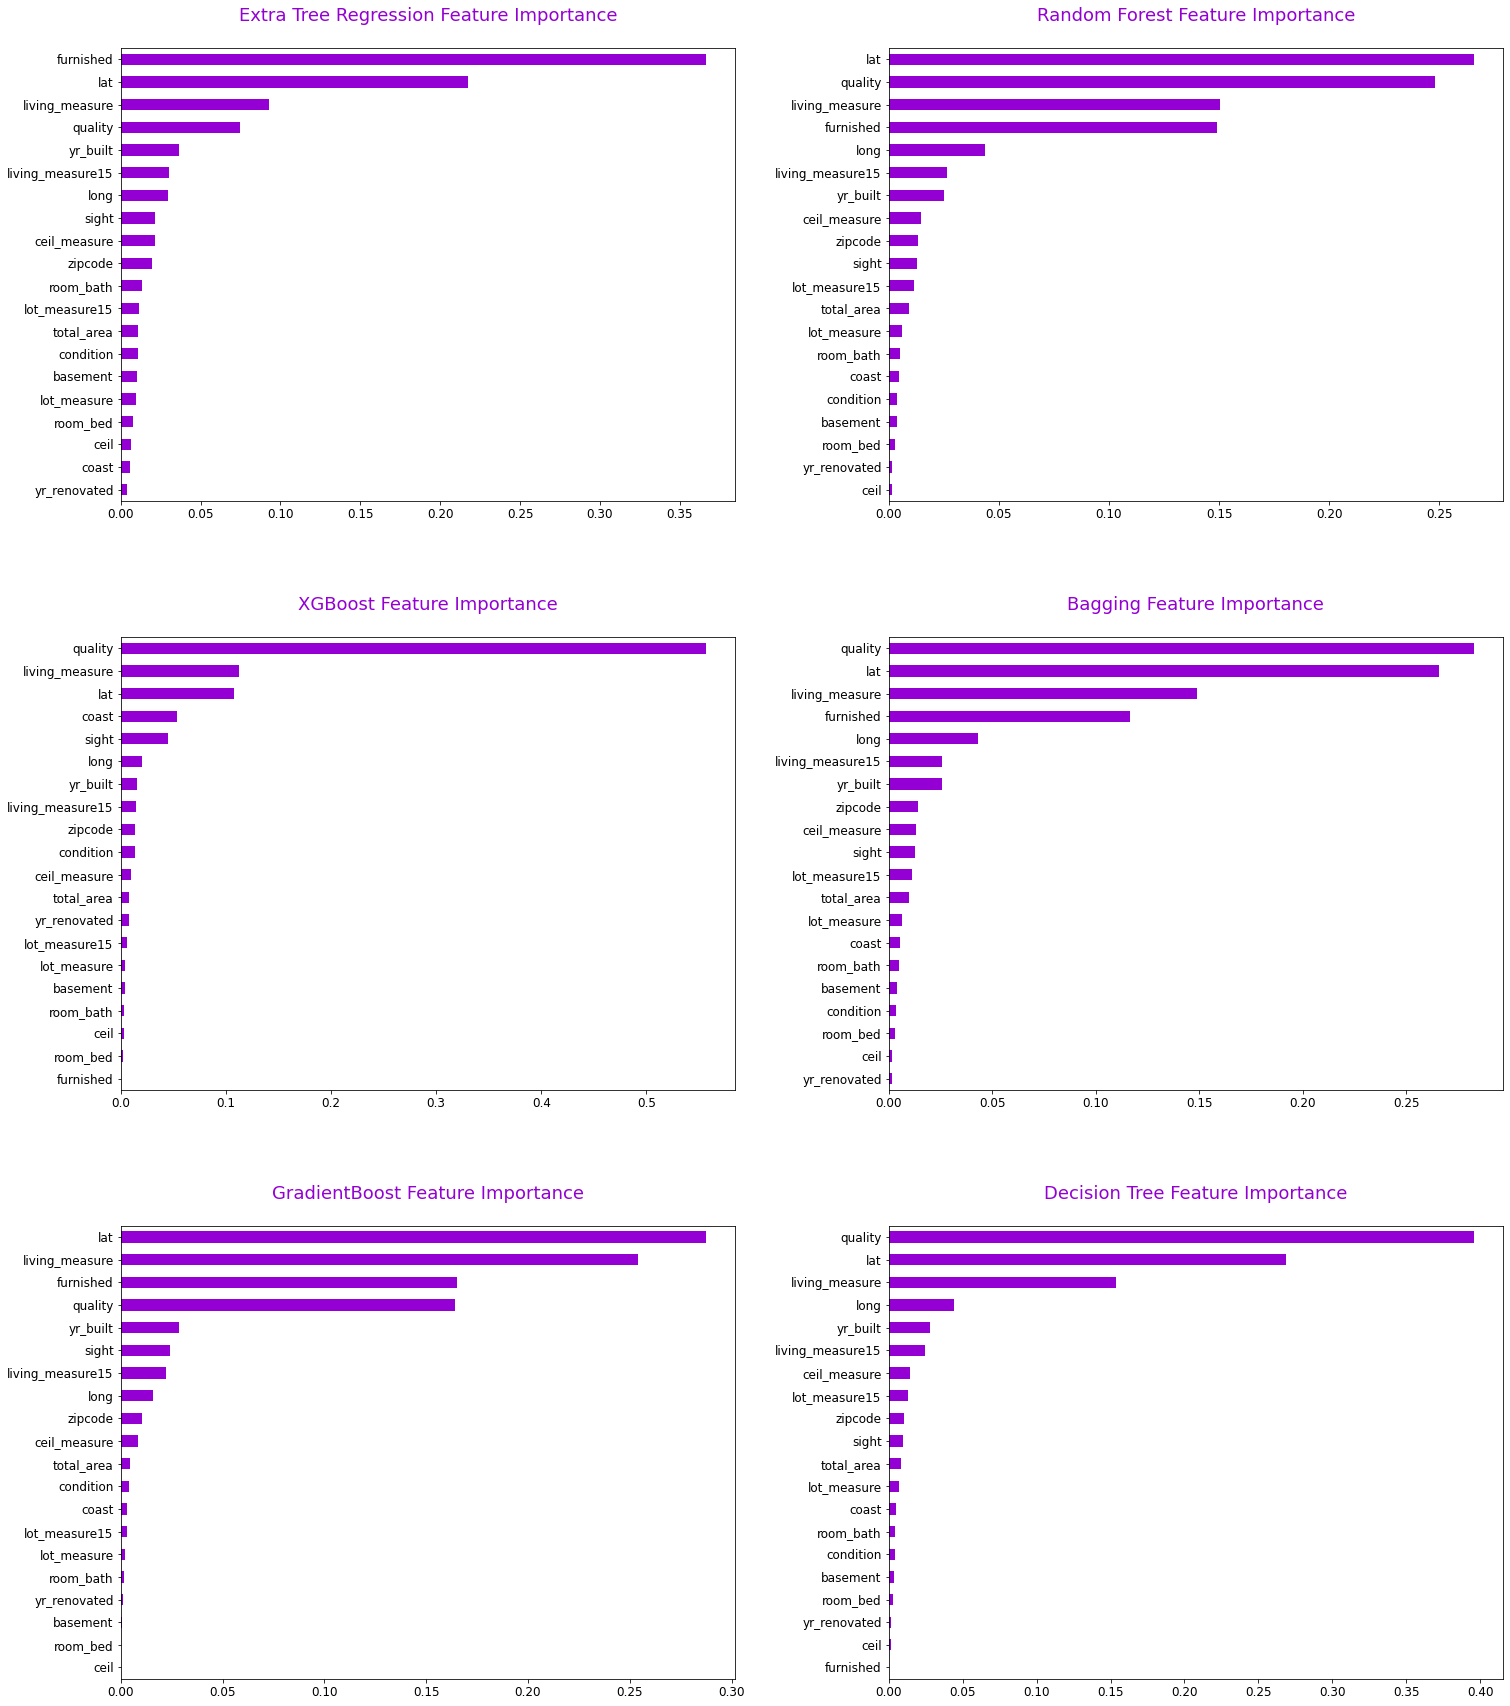

In [15]:
# Getting Feature Importances from varius techniques

# Extra Tree Regression Feature Importance 
ET = ExtraTreesRegressor()
ET.fit(X, y)             
ET_imp = ET.feature_importances_  # Getting feature importance
ET = pd.Series(ET_imp, index=X.columns).sort_values()

# Random Forest Feature Importance
RF = RandomForestRegressor(random_state=1)
RF.fit(X, y)
RF_imp = RF.feature_importances_
RF = pd.Series(RF_imp, index=X.columns).sort_values()

# XGBoost Feature Importance
XG = XGBRegressor(random_state=1)
XG.fit(X, y)
XG_imp = XG.feature_importances_
XG = pd.Series(XG_imp, index=X.columns).sort_values()

# Bagging Regressor Feature Importance
BG = BaggingRegressor(random_state=1)
BG.fit(X, y)
BG_imp = np.mean([
    tree.feature_importances_ for tree in BG.estimators_
], axis=0)
BG = pd.Series(BG_imp, index=X.columns).sort_values()

# GradientBoost Feature Importance
GB =GradientBoostingRegressor(random_state=1)
GB.fit(X, y)
GB_imp = GB.feature_importances_
GB = pd.Series(GB_imp, index=X.columns).sort_values()

# Decision Tree Feature Importance
DT = DecisionTreeRegressor(random_state=1)
DT.fit(X, y)
DT_imp = DT.feature_importances_
DT = pd.Series(DT_imp, index=X.columns).sort_values()

# Displaying the  Feature Importances shown by varius techniques

# Getting subplots

fig, axis = plt.subplots(3, 2, figsize=(24, 30)) 
plt.subplots_adjust(wspace=0.25, hspace=0.3, left=0.1)

# Plotting Feature Importances
ET.plot(kind='barh', color= '#9400D3',ax=axis[0, 0])  
axis[0, 0].set_title('Extra Tree Regression Feature Importance\n')

RF.plot(kind='barh', color= '#9400D3',ax=axis[0, 1])
axis[0, 1].set_title('Random Forest Feature Importance\n')

XG.plot(kind='barh', color= '#9400D3',ax=axis[1, 0])
axis[1, 0].set_title('XGBoost Feature Importance\n')

BG.plot(kind='barh', color= '#9400D3',ax=axis[1, 1])
axis[1, 1].set_title('Bagging Feature Importance\n')

GB.plot(kind='barh', color= '#9400D3',ax=axis[2, 0])
axis[2, 0].set_title('GradientBoost Feature Importance\n')


DT.plot(kind='barh', color= '#9400D3',ax=axis[2, 1])
axis[2, 1].set_title('Decision Tree Feature Importance\n')

print('\033[1mPlots showing Feature Importances shown by varius techniques:-\n')
plt.show()

***
**Key Observations:-**
* By using various methods we calculated the feature importance scores and plotted them for better understanding.
* By checking the accuracy score of our model, we will consider the top importance scores from all the scores of all different methods.
* Hence all the attributes that appear on top score in any of the model, will be selected.
***

### <span style="color:#9400D3">2. Checking the accuracies of the model based on different threshold values for the top importance scores.
   
* Here we are checking the accuracies for our final selected model.
* We are passing all possible threshold values to the loop and getting the model accuracies based on those threshold values.
* All the threshold values are set for every feature importance scores from various regressors, and then we will consider the top scores.
* Then all the features that are appearing on the top scores are getting selected. Futher we will calculate the accuracies by considering those features.
* Then we will select the final threshold value based on highest accuracy of the final model.

In [55]:
# Creating a list of feature importance techniques and empty list to store accuracies and number of columns
Fea_imp = [ET,DT,RF,XG,BG,GB]
Train_Accuracy = []
Test_Accuracy = []
Columns = []

# Getting the accuracies based on different threshold values
for top_scr in range(0,20):
    
    # Segregating the data
    x = House_Data.drop(columns='price')
    Y = House_Data['price']
    
    # Creating empty list to store top features based on various threshold value
    Top_Features = []
    
    for col in x.columns:
        for imp_scr in Fea_imp:
            if col in imp_scr[top_scr:] and col not in Top_Features:
                Top_Features.append(col) # Appending top features according to the condition
     
    # Considering only the top features in predictors
    x = x[Top_Features]
    
    # Getting number of columns of predictors
    Columns.append(x.shape[1])
    
    # Splitting the data to train and test sets in 75:25 ratio
    X_train, X_test, y_train, y_test = train_test_split(x, Y, random_state=1, test_size=0.25)
    
    # Building the model
    mdl = GradientBoostingRegressor(random_state=1)
    mdl.fit(X_train,y_train)
    
    # Getting the accuracies
    Train_Accuracy.append(round(mdl.score(X_train,y_train),4)*100)
    Test_Accuracy.append(round(mdl.score(X_test,y_test),4)*100)
    
# Displaying Threshold Report
Threshold_Report = pd.DataFrame({'Threshold':list(range(0,20)),'Number of Columns':Columns,'Train Accuracy':Train_Accuracy,
                                 'Test Accuracy':Test_Accuracy}).set_index('Threshold')
print('\033[1mTable Showing Accuracies based on Threshold values:-')
display(Threshold_Report.sort_values(['Test Accuracy'],ascending=False))

Table Showing Accuracies based on Threshold values:-


Number of Columns  Train Accuracy  Test Accuracy
Threshold                                                  
8                         16           88.76          87.78
9                         14           88.69          87.77
10                        13           88.58          87.73
4                         18           88.74          87.66
5                         18           88.74          87.66
6                         18           88.74          87.66
7                         18           88.74          87.66
1                         20           88.76          87.65
0                         20           88.76          87.65
3                         19           88.76          87.65
2                         20           88.76          87.65
11                        12           88.32          87.47
12                        12           88.32          87.47
13                        10           87.84          86.97
14                         9           87.63          86.66
15                         8           87.33          86.65
16                         6           86.04          85.50
17                         4           80.83          80.49
18                         4           80.83          80.49
19                         3           72.84          72.24

***
**Key Observations:-**
* We can observe that for threshold = 8, we are getting the highest test accuracy.
* Hence we are setting threshold value as 8 and we have 16 columns with this threshold.
***

### <span style="color:#9400D3">3. Setting the Threshold value and Selecting the Features.
    
* Based on the above table threshold 8 is showing high accuracy, when compared to other values.
* Hence we will set a threshold score as 8 and we have 16 columns with this threshold.
* So all the features that appear on top 8 importance scores in any of the models will be selected.

In [16]:
# Creating a list of feature importance techniques and empty list to store selected features
Fea_imp = [ET,DT,RF,XG,BG,GB]
Top_Features = []
threshold = 8  # Setting the threshold as 8

# Getting the features based threshold score
for col in X.columns:
    for imp_scr in Fea_imp:
        if col in imp_scr[threshold:] and col not in Top_Features: # Selecting features that appear on top 8 scores
            Top_Features.append(col)

# Selecting the attributes(feature selection) based on threshold value
X = X[Top_Features]

# Splitting the data to train and test sets with 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

# Getting Shape and Size of Predictor data 
X_shape = X.shape

# Checking the Dataset
print('\033[1mPredictor data consist:-\033[0m\n Rows    =',X_shape[0],'\n Columns =',X_shape[1],'\n\n\033[1mDataset:-\033[0m')
display(X.head())

Predictor data consist:-
 Rows    = 21613 
 Columns = 16 

Dataset:-


room_bath  living_measure  lot_measure  coast  sight  condition  quality  \
0       3.25        1.146116     0.941623      0      0          5        9   
1       2.50        0.586117    -0.238830      0      0          3        8   
2       2.50        0.371650    -0.868194      0      0          3        8   
3       1.00       -1.475153    -0.963312      0      0          4        6   
4       1.50       -0.784091    -0.922491      0      0          4        8   

   ceil_measure  yr_built  zipcode       lat      long  living_measure15  \
0      1.636673      1956    98133  1.135591 -0.882558          0.223252   
1     -0.025606      1976    98023 -1.757746 -1.246974          0.438974   
2      0.785900      2006    98038 -1.505147  1.573604          0.608470   
3     -1.242865      1916    98133  1.045377 -0.977306         -0.701270   
4     -0.483714      1954    98115  0.842577 -0.394241         -0.115739   

   lot_measure15  furnished  total_area  
0      -0.170774          1    1.050860  
1       0.115013          0   -0.135220  
2      -0.905297          0   -0.754558  
3      -1.020804          0   -1.129188  
4      -0.540442          0   -0.984134

***
**Key Observations:-**
* We have set threshold as 8 and we are getting 16 columns.
* Hence feature selection is done succcessfully now we have 16 features.
***

## <span style="color:#9400D3">- Model Tuning and Feature Reduction
    
**Parameter Tuning** 
    
  Parameter tuning is done to improve the accuracy of the model by changing the parameter values of the model.
* In parameter tuning we followed manual parameter tuning method.
* In this method we considered every parameter which are contributing to increase our model accuracy.
* For each parameter we tried all possible values and select the best value that is increasing the model accuracy.
* Based on above process we have selected {random_state=1, learning_rate=0.3, subsample=0.7, min_samples_leaf=40} as our best parameters.
* 'learning_rate' is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
* The 'subsample' is the fraction of samples to be used for fitting the individual learners.
* 'min_samples_leaf' is the minimum number of samples required to be at a leaf node.
* 'random_state' is the seed used by the random number generator.

**Feature Reduction**
    
  Feature reduction is done to reduce the data dimension and to increase model's computation time. By this we can improve our model's performance.
* Reduction of feature is done based on the accuracy change. If there is no change in accuracy without considering a particular feature then we will remove that feature.
* We checked all the 16 features, and by observing the accuracy change after reducing the features, we selected 'coast' and 'furnished' for reduction.
* Also we dropped 'lot_measure', since 'lot_measure' and 'total_area' are highly corelated.

In [17]:
# Getting accuracies without tuning and before reducing features
model_1 = GradientBoostingRegressor(random_state=1)
model_1.fit(X_train,y_train)
train_1 = round(model_1.score(X_train,y_train),4)*100
test_1 = round(model_1.score(X_test,y_test),4)*100

# Getting accuracies with tuning and before reducing features
model_2 = GradientBoostingRegressor(random_state=1, learning_rate=0.3, subsample=0.7, min_samples_leaf=40)
model_2.fit(X_train,y_train)
train_2 = round(model_2.score(X_train,y_train),4)*100
test_2 = round(model_2.score(X_test,y_test),4)*100

# Reducing Features and splitting the data to train and test sets
X = X.drop(['coast','furnished','lot_measure'],axis=1) 

# After checking changes in accuracies we dropped these features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25) 

# Getting accuracies without tuning and after reducing features
model_3 = GradientBoostingRegressor(random_state=1)
model_3.fit(X_train,y_train)
train_3 = round(model_3.score(X_train,y_train),4)*100
test_3 = round(model_3.score(X_test,y_test),4)*100

# Getting accuracies with tuning and after reducing features
model_4 = GradientBoostingRegressor(random_state=1, learning_rate=0.3, subsample=0.7, min_samples_leaf=40)
model_4.fit(X_train,y_train)
train_4 = round(model_4.score(X_train,y_train),4)*100
test_4 = round(model_4.score(X_test,y_test),4)*100

# Displaying Accuracies of GradientBoostingRegressor
print('\033[1mReport showing Accuracy and RMSE of GradientBoostingRegressor model:-')
Model_Report3 = pd.DataFrame({'Feature Reduction':['Before','After'],'Train ':[train_1,train_3],'Test':[test_1, test_3],
                              'Train':[train_2,train_4],'Test ':[test_2,test_4]}).set_index('Feature Reduction')
columns=[('Accuracy Without Tuning (%)', 'Train '),('Accuracy Without Tuning (%)', 'Test'),
         ('Accuracy With Tuning (%)', 'Train'),('Accuracy With Tuning (%)', 'Test ')]
Model_Report3.columns = pd.MultiIndex.from_tuples(columns)
display(Model_Report3)

# Displaying the final shape of predictors
print('\n\n\033[1mPredictors after feature reduction has:-\033[0m\n Rows    =',X.shape[0],'\n Columns =',X.shape[1])

Report showing Accuracy and RMSE of GradientBoostingRegressor model:-


Accuracy Without Tuning (%)        Accuracy With Tuning (%)  \
                                       Train    Test                    Train   
Feature Reduction                                                               
Before                                  88.76  87.78                    90.48   
After                                   88.56  87.71                    90.42   

                          
                   Test   
Feature Reduction         
Before             89.09  
After              89.32



Predictors after feature reduction has:-
 Rows    = 21613 
 Columns = 13


***
**Key Observations:-**
* We can observe that with parameter tuning we are getting better results.
* After feature reduction we have 14 feature in predictors.
* We can go for dropping the features since we find significant increase in the test accuracy after dropping them.
***

## <span style="color:#9400D3">- Checking the Performance of Final Model
* Here we are considering some parameters for our model and checking the results accordingly.

In [18]:
# Fitting the model
Model = GradientBoostingRegressor(random_state=1, learning_rate=0.3, subsample=0.7, min_samples_leaf=40)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)

# Getting Train and Test Accuracies
Train = round(Model.score(X_train,y_train),4)*100
Test = round(Model.score(X_test,y_test),4)*100

# Getting variance score, error scores and r2 value
EV = explained_variance_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred) 
MSE = mean_squared_error(y_test, y_pred) 
MdAE = median_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Displaying the result
shape = X.shape
print('\033[1mFinalised Dataset consist:-','\n Rows =',shape[0],'\n Columns =',shape[1],'\n Target Attribute = Price',
      '\n\n\033[1mDataset:-\033[0m')
display(X.head())

parameters = ['Model Name','Train Accuracy (%)','Test Accuracy (%)','R-squared value','Explained Variance',
              'Mean Absolute Error','Mean Squared Error','Median Absolute Error','Root Mean Square Error']
Results = ['GradientBoostingRegressor',Train,Test,round(R2,4),round(EV,4),round(MAE,4),round(MSE,4),round(MdAE,4),
           round(np.sqrt(MSE),4)]
Final_Report = pd.DataFrame({'Parameters':parameters,'Result':Results})
print('\033[1m\n\nReport showing the results of our Final Model:-')
display(Final_Report)

Finalised Dataset consist:- 
 Rows = 21613 
 Columns = 13 
 Target Attribute = Price 

Dataset:-


room_bath  living_measure  sight  condition  quality  ceil_measure  \
0       3.25        1.146116      0          5        9      1.636673   
1       2.50        0.586117      0          3        8     -0.025606   
2       2.50        0.371650      0          3        8      0.785900   
3       1.00       -1.475153      0          4        6     -1.242865   
4       1.50       -0.784091      0          4        8     -0.483714   

   yr_built  zipcode       lat      long  living_measure15  lot_measure15  \
0      1956    98133  1.135591 -0.882558          0.223252      -0.170774   
1      1976    98023 -1.757746 -1.246974          0.438974       0.115013   
2      2006    98038 -1.505147  1.573604          0.608470      -0.905297   
3      1916    98133  1.045377 -0.977306         -0.701270      -1.020804   
4      1954    98115  0.842577 -0.394241         -0.115739      -0.540442   

   total_area  
0    1.050860  
1   -0.135220  
2   -0.754558  
3   -1.129188  
4   -0.984134



Report showing the results of our Final Model:-


Parameters                     Result
0              Model Name  GradientBoostingRegressor
1      Train Accuracy (%)                      90.42
2       Test Accuracy (%)                      89.32
3         R-squared value                     0.8932
4      Explained Variance                     0.8932
5     Mean Absolute Error                     0.2332
6      Mean Squared Error                     0.1059
7   Median Absolute Error                     0.1702
8  Root Mean Square Error                     0.3254

***
**Key Observations:-**
* We can observe in the finalised dataset contains 'lat' and 'long' along with the 'zipcode'. This is because if we remove either of them then our model's accuracy gets decreased. And from user perspective we can say that if user input the particular location of the house using geo locations (which uses 'lat' & 'long'), then he will get a better price prediction. And if user wants to check the price based on a particular region, he should input the zipcode of that area. Hence it is useful to keep these attributes.
* We can observe that we got low errors. 
* R2 value is showing a high level of correlation.
* Explained Variance is above 0.89 which is good.
* RMSE value lies between 0.2 and 0.5 which is good and by which we can say that the model is relatively predicting the data accurately.
***

# <span style="color:#9400D3"> Pickling the selected model.
Pickle is the standard way of serializing objects in Python.

In [19]:
# Saving the Final best trained model to the file
pickle.dump(Model, open('Housing_Model.pkl', 'wb')) 

# Loading the Pickled File and getting the model
pickled_file = open('Housing_Model.pkl', 'rb')
pickled_model = pickle.load(pickled_file) 
pickled_file.close()
  
# Checking the loaded model by finding accuracies
Train_AC = round(pickled_model.score(X_train , y_train),4)*100
Test_AC = round(pickled_model.score(X_test , y_test),4)*100

print('\033[1mTable Showing Pickled Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Model Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

Table Showing Pickled Model Accuracies for Train and Test Data:-


Model Accuracy (%)
Data                        
Training               90.42
Testing                89.32

***
**Key Observations:-**
* We successfully pickled our final model
***

# <span style="color:#9400D3"> Predicting New Data
    
* Here we are using our X data as our New Data, since we have actual price for this data to compare it with predicted price.
* We will predict for 5 different values.
* We are using our pickled model to make predictions.
    
NOTE:- 'raw_data' below is used for displaying user input.

In [20]:
# Creating New Data
raw_data = Input_Data[X.columns][0:5]  # For displaying raw input before scaling it
New_Data = X[0:5]   # Scaled version of raw data (pre-scaled)

# Generating Prediction
Z_pred = pickled_model.predict(New_Data)  # Returns z-scored price in array

# Re-transforming predicted values from z-scored to normal
sd = Price.std()
m = Price.mean()
Prediction = Z_pred*sd + m  # Re-transforming using Z-score formula (z = (x-μ)/σ)

# Displaying the Prediction Report
print('\033[1mPrediction Report:-\n')
print('\033[1m Input Data:')
display(raw_data)
print('\033[1m\n Prediction Report:')
display(pd.DataFrame({'Actual Price':Price[0:5],'Predicted Price':np.round(Prediction),
                      'Difference':Price[0:5] - np.round(Prediction),
                      'HL Percentage(%)':round(((Price[0:5] - np.round(Prediction))/Price[0:5]*100),2),
                      'Prediction Accuracy (%)':round(np.round(Prediction)/Price[0:5]*100,2)}))

Prediction Report:-

 Input Data:


room_bath  living_measure  sight  condition  quality  ceil_measure  \
0       3.25          3020.0      0          5        9        3020.0   
1       2.50          2550.0      0          3        8        1750.0   
2       2.50          2370.0      0          3        8        2370.0   
3       1.00           820.0      0          4        6         820.0   
4       1.50          1400.0      0          4        8        1400.0   

   yr_built  zipcode      lat     long  living_measure15  lot_measure15  \
0      1956    98133  47.7174 -122.336            2120.0         7553.0   
1      1976    98023  47.3165 -122.386            2260.0         8800.0   
2      2006    98038  47.3515 -121.999            2370.0         4348.0   
3      1916    98133  47.7049 -122.349            1520.0         3844.0   
4      1954    98115  47.6768 -122.269            1900.0         5940.0   

   total_area  
0     16477.0  
1     10050.0  
2      6694.0  
3      4664.0  
4      5450.0


 Prediction Report:


Actual Price  Predicted Price  Difference  HL Percentage(%)  \
0      808100.0         797173.0     10927.0              1.35   
1      277500.0         284683.0     -7183.0             -2.59   
2      404000.0         374064.0     29936.0              7.41   
3      300000.0         295664.0      4336.0              1.45   
4      699000.0         622997.0     76003.0             10.87   

   Prediction Accuracy (%)  
0                    98.65  
1                   102.59  
2                    92.59  
3                    98.55  
4                    89.13

***
**Key Observations:-**
* In prediction report we have,
  1. 'Actual Price' = which is given house prices, 
  2. 'Predicted Price' = which is model's predicted price, 
  3. 'Difference' = (Actual Price - Predicted Price), 
  4. 'HL Percentage(%)' = High/Low percentage which is showing how much the predicted price is increased(-) or decreased(+) when compared to actual price.
  5. 'Prediction Accuracy (%)' = Model's prediction accuracy for each input data.
* We can observe that our model is predicting pretty well for most of the data.
* Our model is performing pretty good for new data.
***

## <span style="color:#9400D3">Conclusion

   In the beginning we imported our Housing data file, and made some explorations on it. Then we had done data cleansing process. In this we made some modifications on 'dayhours' attribute. Further we had done some statistical analysis on our data to find some insights regarding mean, standard deviation etc. In EDA part we fond that there are many outliers in the continuous variables. These outliers are handled by flooriing and capping method, under data pre-processing. We had found some hidden patterns to get better insight of the data.
    
    
   After segregating the data interms of predictors and target attributes, we splitted the data into train and test accuracies with 75:25 ratio. Then we applied all the possible models and that are suitable for our data. By observing the results from all the models we choose **GradientBoostingRegressor** as our final model. Further we did feature selection by considering top 6 regressors which are having high accuracies. After that we did model tuning along with feature reduction. At the end we have 13 input features and a target. We applied these features to check the model performance. 
    
   Model performance of **GradientBoostingRegressor** is showing 89.32% test accuracy with 0.32 rmse. We pickled the same model in .pkl file, then we rechecked it. Using the pickled model we predicted the price values for new data and our model performed pretty good.

**Closing Sentence:- The price predictions made by our model will help the buyer/seller to find the approximate price of the house.**
    
***